# **Proyecto EDA - Exploratory Data Analysis**

# Año 2021

In [4]:
#Importamos todas las bibliotecas que vamos a necesitar:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import squarify
from scipy.stats import chi2_contingency
import geopandas as gpd
import contextily as ctx


## Limpieza de datos

En primer lugar, cargamos el dataset de accidentes intraurbanos de Madrid para el año 2021

In [5]:
direccion="../src/data/2021_Accidentalidad.csv"
df_accidentes_2021=pd.read_csv(direccion, sep=";", encoding="utf-8")

y visualizamos la información general del dataset:

In [6]:
#Hechamos un vistazo a las 5 primeras filas:
df_accidentes_2021.head(5)

num_expediente       fecha     hora                         localizacion  \
0    2020S019534  01/01/2021  4:30:00  AVDA. PABLO NERUDA / CALL. LEONESES   
1    2020S019534  01/01/2021  4:30:00  AVDA. PABLO NERUDA / CALL. LEONESES   
2    2020S019534  01/01/2021  4:30:00  AVDA. PABLO NERUDA / CALL. LEONESES   
3    2020S019534  01/01/2021  4:30:00  AVDA. PABLO NERUDA / CALL. LEONESES   
4    2020S019534  01/01/2021  4:30:00  AVDA. PABLO NERUDA / CALL. LEONESES   

  numero  cod_distrito            distrito           tipo_accidente  \
0     57          13.0  PUENTE DE VALLECAS  Colisión fronto-lateral   
1     57          13.0  PUENTE DE VALLECAS  Colisión fronto-lateral   
2     57          13.0  PUENTE DE VALLECAS  Colisión fronto-lateral   
3     57          13.0  PUENTE DE VALLECAS  Colisión fronto-lateral   
4     57          13.0  PUENTE DE VALLECAS  Colisión fronto-lateral   

  estado_meteorológico tipo_vehiculo tipo_persona       rango_edad  \
0            Despejado       Turismo    Conductor  De 30 a 34 años   
1            Despejado       Turismo    Conductor  De 35 a 39 años   
2            Despejado       Turismo    Conductor      Desconocido   
3            Despejado       Turismo     Pasajero  De 10 a 14 años   
4            Despejado       Turismo     Pasajero  De 35 a 39 años   

          sexo  cod_lesividad  \
0        Mujer           14.0   
1       Hombre            7.0   
2  Desconocido            NaN   
3       Hombre           14.0   
4        Mujer           14.0   

                                           lesividad  coordenada_x_utm  \
0                           Sin asistencia sanitaria          444976.0   
1  Asistencia sanitaria sólo en el lugar del acci...          444976.0   
2                                                NaN          444976.0   
3                           Sin asistencia sanitaria          444976.0   
4                           Sin asistencia sanitaria          444976.0   

   coordenada_y_utm positiva_alcohol  positiva_droga  
0         4470508.0                N             NaN  
1         4470508.0                N             NaN  
2         4470508.0                N             NaN  
3         4470508.0                N             NaN  
4         4470508.0                N             NaN

In [7]:
#Visualizamos información general del dataframe:
print(f"La base de datos tiene {len(df_accidentes_2021.columns)} campos y {len(df_accidentes_2021)} registros.")
print(1*"\n")
df_accidentes_2021.info()

La base de datos tiene 19 campos y 41783 registros.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41783 entries, 0 to 41782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        41783 non-null  object 
 1   fecha                 41783 non-null  object 
 2   hora                  41783 non-null  object 
 3   localizacion          41783 non-null  object 
 4   numero                41780 non-null  object 
 5   cod_distrito          41780 non-null  float64
 6   distrito              41780 non-null  object 
 7   tipo_accidente        41779 non-null  object 
 8   estado_meteorológico  37355 non-null  object 
 9   tipo_vehiculo         41729 non-null  object 
 10  tipo_persona          41780 non-null  object 
 11  rango_edad            41783 non-null  object 
 12  sexo                  41783 non-null  object 
 13  cod_lesividad         22819 non-null  float64
 14  lesividad       

In [8]:
#Obtenemos información de las variables numéricas:
#Variables numéricas: cod_lesividad, coordenada_x_utm, coordenada_y_utm, positiva_alcohol
df_accidentes_2021.describe()

cod_distrito  cod_lesividad  coordenada_x_utm  coordenada_y_utm  \
count  41780.000000   22819.000000      41771.000000      4.177100e+04   
mean       9.887697       9.996626     442087.280721      4.474754e+06   
std        5.609092       4.741567       3435.287175      3.933428e+03   
min        1.000000       1.000000     429078.000000      4.463455e+06   
25%        5.000000       7.000000     439904.000000      4.471734e+06   
50%       10.000000      14.000000     441777.000000      4.474815e+06   
75%       14.000000      14.000000     443996.000000      4.477463e+06   
max       21.000000      14.000000     454178.000000      4.495115e+06   

       positiva_droga  
count            89.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0

Después, comprobamos si hay duplicados:

In [9]:
duplicados=df_accidentes_2021[df_accidentes_2021.duplicated(keep=False)]
duplicados.shape
#Hay 3161 duplicados (Keep =False)

(3161, 19)

In [10]:
#Eliminamos los duplicados, quedandonos con el primero (keep = first):
df_accidentes_2021_sin_duplicados=df_accidentes_2021.drop_duplicates(keep = "first")

In [11]:
#Comprobamos las nuevas dimensiones del dataframe:
df_accidentes_2021_sin_duplicados.shape

(39966, 19)

Generamos una copia del dataset sin duplicados:

In [12]:
#Generamos una copia:
df_21=df_accidentes_2021_sin_duplicados.copy()

Generamos una tabla que incluya número de nulos, cardinalidad  y tipificación de las variables:

In [13]:
#Obtenemos número de nulos y cardinalidad de todas las variables
#Creamos el df de tipificación
def nulos_cardinalidad(df,umbral_categoria, umbral_continua):
    nulls=df.isna().sum().sort_values(ascending=False)
    nulls_rel=(df.isna().sum()/len(df)*100).sort_values(ascending=False)
    card=df.nunique()
    card_rel=df.nunique()/len(df)*100
    tipo=df.dtypes
    df_tipificacion= pd.DataFrame([nulls, nulls_rel, card, card_rel, tipo]).T.rename(columns = {0: "Nulls", 1: "Nulls_rel", 2: "Card", 3: "Card_rel", 4: "Tipo"}) #hace falta poner corchetes
    #Generamos columna "Clasificada_como:"
    # df_tipificacion["Clasificada_como"]="sin categoría" #partimos asumiendo que todas son categoricas
    # df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
    # df_tipificacion.loc[df_tipificacion.Tipo == "datetime64[ns]", "Clasificada_como"] = "Fecha"
    # df_tipificacion.loc[(df_tipificacion.Card > 2) & (df_tipificacion.Card < umbral_categoria), "Clasificada_como"] = "Categórica"
    # df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card > 2) & (df_tipificacion.Card < umbral_categoria), "Clasificada_como"] = "Numérica ordinal"
    # df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card > umbral_categoria) & (df_tipificacion.Card_rel < umbral_continua), "Clasificada_como"] = "Numérica discreta"
    # df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card_rel > umbral_continua), "Clasificada_como"] = "Numérica continua"
    return df_tipificacion

In [14]:
df_tipificacion=nulos_cardinalidad(df_21,38,30)
df_tipificacion

Nulls  Nulls_rel   Card   Card_rel     Tipo
positiva_droga        39877  99.777311      1   0.002502  float64
lesividad             17489  43.759696      8   0.020017   object
cod_lesividad         17489  43.759696      8   0.020017  float64
estado_meteorológico   4156  10.398839      7   0.017515   object
positiva_alcohol        166   0.415353      2   0.005004   object
tipo_vehiculo            54   0.135115     37   0.092579   object
coordenada_x_utm         12   0.030026   9430  23.595056  float64
coordenada_y_utm         12   0.030026  10206  25.536706  float64
tipo_accidente            4   0.010009     13   0.032528   object
distrito                  3   0.007506     21   0.052545   object
numero                    3   0.007506    768   1.921633   object
tipo_persona              3   0.007506      3   0.007506   object
cod_distrito              3   0.007506     21   0.052545  float64
num_expediente            0        0.0  17952   44.91818   object
fecha                     0        0.0    365   0.913276   object
hora                      0        0.0   1106   2.767352   object
localizacion              0        0.0  13500  33.778712   object
rango_edad                0        0.0     18   0.045038   object
sexo                      0        0.0      3   0.007506   object

Procedemos a la limpieza de datos. Primero, tratamos los nulos de los diferentes campos:

In [15]:
#Contabilizamos el número de nulos por campo:
df_21.isna().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      3
cod_distrito                3
distrito                    3
tipo_accidente              4
estado_meteorológico     4156
tipo_vehiculo              54
tipo_persona                3
rango_edad                  0
sexo                        0
cod_lesividad           17489
lesividad               17489
coordenada_x_utm           12
coordenada_y_utm           12
positiva_alcohol          166
positiva_droga          39877
dtype: int64

In [16]:
#TRATAMOS LOS NULOS

#Eliminamos dobles espacios y unificamos el formato de los campos: "num_expediente", "localizacion", "numero"
cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_21[col] = df_21[col].astype(str).str.lower().str.strip().str.replace(r"\s+", " ", regex=True)

    
# A. ESTADO METEOROLÓGICO
df_21['estado_meteorológico'] = df_21['estado_meteorológico'].fillna("Se desconoce") 


# B. TIPO DE PERSONA Y VEHÍCULO 

mask_no_aplica = df_21['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 
# Peatón y testigo → No aplica 
df_21['tipo_vehiculo'] = df_21['tipo_vehiculo'].fillna('No consta')
df_21.loc[mask_no_aplica & df_21['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica' 

# C. LESIVIDAD (ORDINAL) 
df_21['cod_lesividad'] = df_21['cod_lesividad'].fillna(14) 
df_21['lesividad'] = df_21['lesividad'].fillna('Sin asistencia sanitaria') 

# D. ALCOHOL Y DROGAS 
df_21['positiva_alcohol'] = df_21['positiva_alcohol'].fillna('No consta') 
df_21['positiva_droga'] = df_21['positiva_droga'].fillna('No consta') 

#E. Quedan 37 nulos, los eliminamos (41783 ---> 41762 registros)
df_21=df_21.dropna()


In [17]:
#Nuevas dimensiones del dataset:
df_21.shape

(39945, 19)

In [18]:

#MODIFICAMOS VARIABLES CATEGÓRICAS:

#Convertimos los campos de fecha y hora a datetime y creamos una nueva columna:
df_21["fecha"] = pd.to_datetime(df_21["fecha"], errors="coerce", dayfirst=True) 
df_21["hora"] = pd.to_datetime(df_21["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_21["fecha_hora"] = df_21.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )


#Simplificamos la variable categórica lesividad:
df_21["lesividad"] = df_21["cod_lesividad"].replace({
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
})

#Reemplazamos los valores del campo positiva_alcohol:
df_21["positiva_alcohol"] = df_21["positiva_alcohol"].replace(
    {"S":"Positivo",
     "N":"Negativo"}
)

#Creamos categoría de franjas horarias:
df_21['franja_horaria'] = pd.cut(
        df_21['fecha_hora'].dt.hour,
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

# Convertir la columna a tipo Categórico con el orden específico:
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]
df_21['rango_edad'] = pd.Categorical(df_21['rango_edad'], categories=orden_edad, ordered=True)



In [19]:
df_21.shape

(39945, 21)

In [20]:
#Eliminamos las columnas cod_distrito, cod_lesividad y positiva_droga:
df_21=df_21.drop(columns=["cod_distrito", "cod_lesividad", "positiva_droga"])

In [21]:
#Nuevas dimensiones del dataset:
df_21.shape

(39945, 18)

In [22]:
# 7. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR). Está ordenado
cols_category = ['distrito',
                 'tipo_accidente',
                 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'rango_edad', 
                 'sexo',  
                 'lesividad', 
                 ] 
for col in cols_category: 
    df_21[col] = df_21[col].astype('category')


Finalmente, visualizamos los valores de las variables categóricas (category):

In [23]:
for categoria in cols_category:
    frec_abs=df_21[categoria].value_counts(dropna=False)
    frec_rel=df_21[categoria].value_counts(dropna=False, normalize=True)*100
    df_frec=pd.concat([frec_abs, frec_rel], axis=1)
    df_frec.columns=["Frec. Absoluta", "Frec. Relativa (%)"]

    print(f"Resumen de {categoria}:")
    print(df_frec)
    print(f"Su cardinalidad es: {df_tipificacion.loc[categoria, "Card"]}")
    print("\n"*2)

Resumen de distrito:
                     Frec. Absoluta  Frec. Relativa (%)
distrito                                               
PUENTE DE VALLECAS             3173            7.943422
SALAMANCA                      2963            7.417699
CIUDAD LINEAL                  2661            6.661660
CHAMARTÍN                      2627            6.576543
CARABANCHEL                    2553            6.391288
MONCLOA-ARAVACA                2195            5.495056
CENTRO                         2120            5.307298
RETIRO                         2103            5.264739
FUENCARRAL-EL PARDO            2032            5.086995
CHAMBERÍ                       1967            4.924271
SAN BLAS-CANILLEJAS            1945            4.869195
ARGANZUELA                     1936            4.846664
LATINA                         1921            4.809113
USERA                          1741            4.358493
TETUÁN                         1674            4.190762
HORTALEZA                  

In [24]:
from pathlib import Path

# Ruta correcta desde tu notebook
ruta_salida = Path("../src/data/2021_Accidentalidad_Limpio.parquet")

# Crear carpeta si no existe
ruta_salida.parent.mkdir(parents=True, exist_ok=True)

# Guardar el dataset limpio en formato Parquet 
df_21.to_parquet(
    ruta_salida,
    index=False,
    compression="snappy",
    engine="pyarrow"
)

print("Archivo guardado en:", ruta_salida.resolve())

Archivo guardado en: C:\Users\aquin\Desktop\Bootcamp_DS\EDA-TEAM\src\data\2021_Accidentalidad_Limpio.parquet


## Análisis univariante

### Tendencias centrales

Miro la moda de las variables categóricas (ordenadas según el número de importancia) para ver qué valores tienen mayor frecuencia absoluta

In [25]:
df_21[cols_category].mode().T


0
distrito                    PUENTE DE VALLECAS
tipo_accidente         Colisión fronto-lateral
estado_meteorológico                 Despejado
tipo_vehiculo                          Turismo
tipo_persona                         Conductor
rango_edad                     De 25 a 29 años
sexo                                    Hombre
lesividad             Sin asistencia sanitaria

Para el análisis temporal y geográfico, generamos un dataframe de accidentes únicos:

In [26]:
#Función que genera un dataframe de accidentes únicos:
def preparar_accidentes_unicos(df, col_id='num_expediente'):
    """
    Devuelve un DataFrame con accidentes únicos (agregados por num_expediente),
    usando la columna fecha_hora ya existente.
    """

    # Asegurar que fecha_hora es datetime
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

    # Agregación por expediente (1 fila = 1 accidente)
    df_unicos = df.groupby(col_id).agg({
        'fecha_hora': 'min',
        'tipo_accidente': 'first',
        'tipo_vehiculo': lambda x: list(x.unique()),
        'distrito': 'first',
        'estado_meteorológico': 'first',
        'rango_edad': 'first',
        'tipo_persona': 'first',
        'sexo': 'first',
        'positiva_alcohol': 'first',
    }).reset_index()

    # Variables temporales derivadas
    df_unicos['año'] = df_unicos['fecha_hora'].dt.year
    df_unicos['mes'] = df_unicos['fecha_hora'].dt.month
    df_unicos['dia_semana'] = df_unicos['fecha_hora'].dt.day_name()
    df_unicos['hora'] = df_unicos['fecha_hora'].dt.hour

    df_unicos['franja'] = pd.cut(
        df_unicos['hora'],
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

    return df_unicos

In [27]:
df_21_unicos=preparar_accidentes_unicos(df_21)

In [28]:
print(f"En 2021, sucedieron {len(df_21_unicos)} accidentes intraurbanos en la ciudad de Madrid")

En 2021, sucedieron 17943 accidentes intraurbanos en la ciudad de Madrid


### Análisis temporal

Dibujamos la frecuencia de accidentes a diferentes escalas temporales (Figura 1):

In [29]:
#FIGURA 1 (VERSIÓN 1)
#Función de variables temporales (versión 1):

def plot_temporal_univariate(df, col_datetime='fecha_hora', por_año=False):
    """
    Genera gráficos univariantes temporales sobre accidentes únicos:
    - Accidentes por mes
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Evolución diaria (línea + media móvil)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")

def _graficos(df, col_datetime, titulo_extra=""):

    fig_1, axes = plt.subplots(3, 2, figsize=(16, 14))
    axes = axes.flatten()  # Para indexar fácilmente

    # 1. Accidentes por mes
    ax1= df['mes'].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], color="steelblue",
        title=f'Accidentes por mes ({titulo_extra})'
    )
    ax1.bar_label(ax1.containers[0])

    # 2. Accidentes por día de la semana
    ax1=df['dia_semana'].value_counts().plot(
        kind='bar', ax=axes[1], color="darkcyan",
        title=f'Accidentes por día de la semana ({titulo_extra})'
    )
    ax1.bar_label(ax1.containers[0])

    # 3. Accidentes por hora
    ax2=df['hora'].value_counts().sort_index().plot(
        kind='bar', ax=axes[2], color="darkorange", 
        title=f'Accidentes por hora ({titulo_extra})'
    )
    ax2.bar_label(ax2.containers[0])
    # 4. Accidentes por franja horaria
    
    ax3=df['franja'].value_counts().plot(
        kind='bar', ax=axes[3], color="mediumseagreen",
        title=f'Accidentes por franja horaria ({titulo_extra})'
    )
    ax3.bar_label(ax3.containers[0])

    # 5. Evolución diaria
    serie_diaria = df.resample('D', on=col_datetime).size()
    serie_diaria.plot(
        kind='line', ax=axes[4], title=f'Evolución diaria ({titulo_extra})'
    )
    axes[4].set_ylabel("Número de accidentes")
   

    # 6. Media móvil 7 días
    serie_diaria.rolling(window=7).mean().plot(
        kind='line', ax=axes[5],
        title=f'Evolución diaria suavizada (media móvil 7 días) ({titulo_extra})'
    )
    axes[5].set_ylabel("Número de accidentes")
    
    plt.tight_layout()
    plt.show()


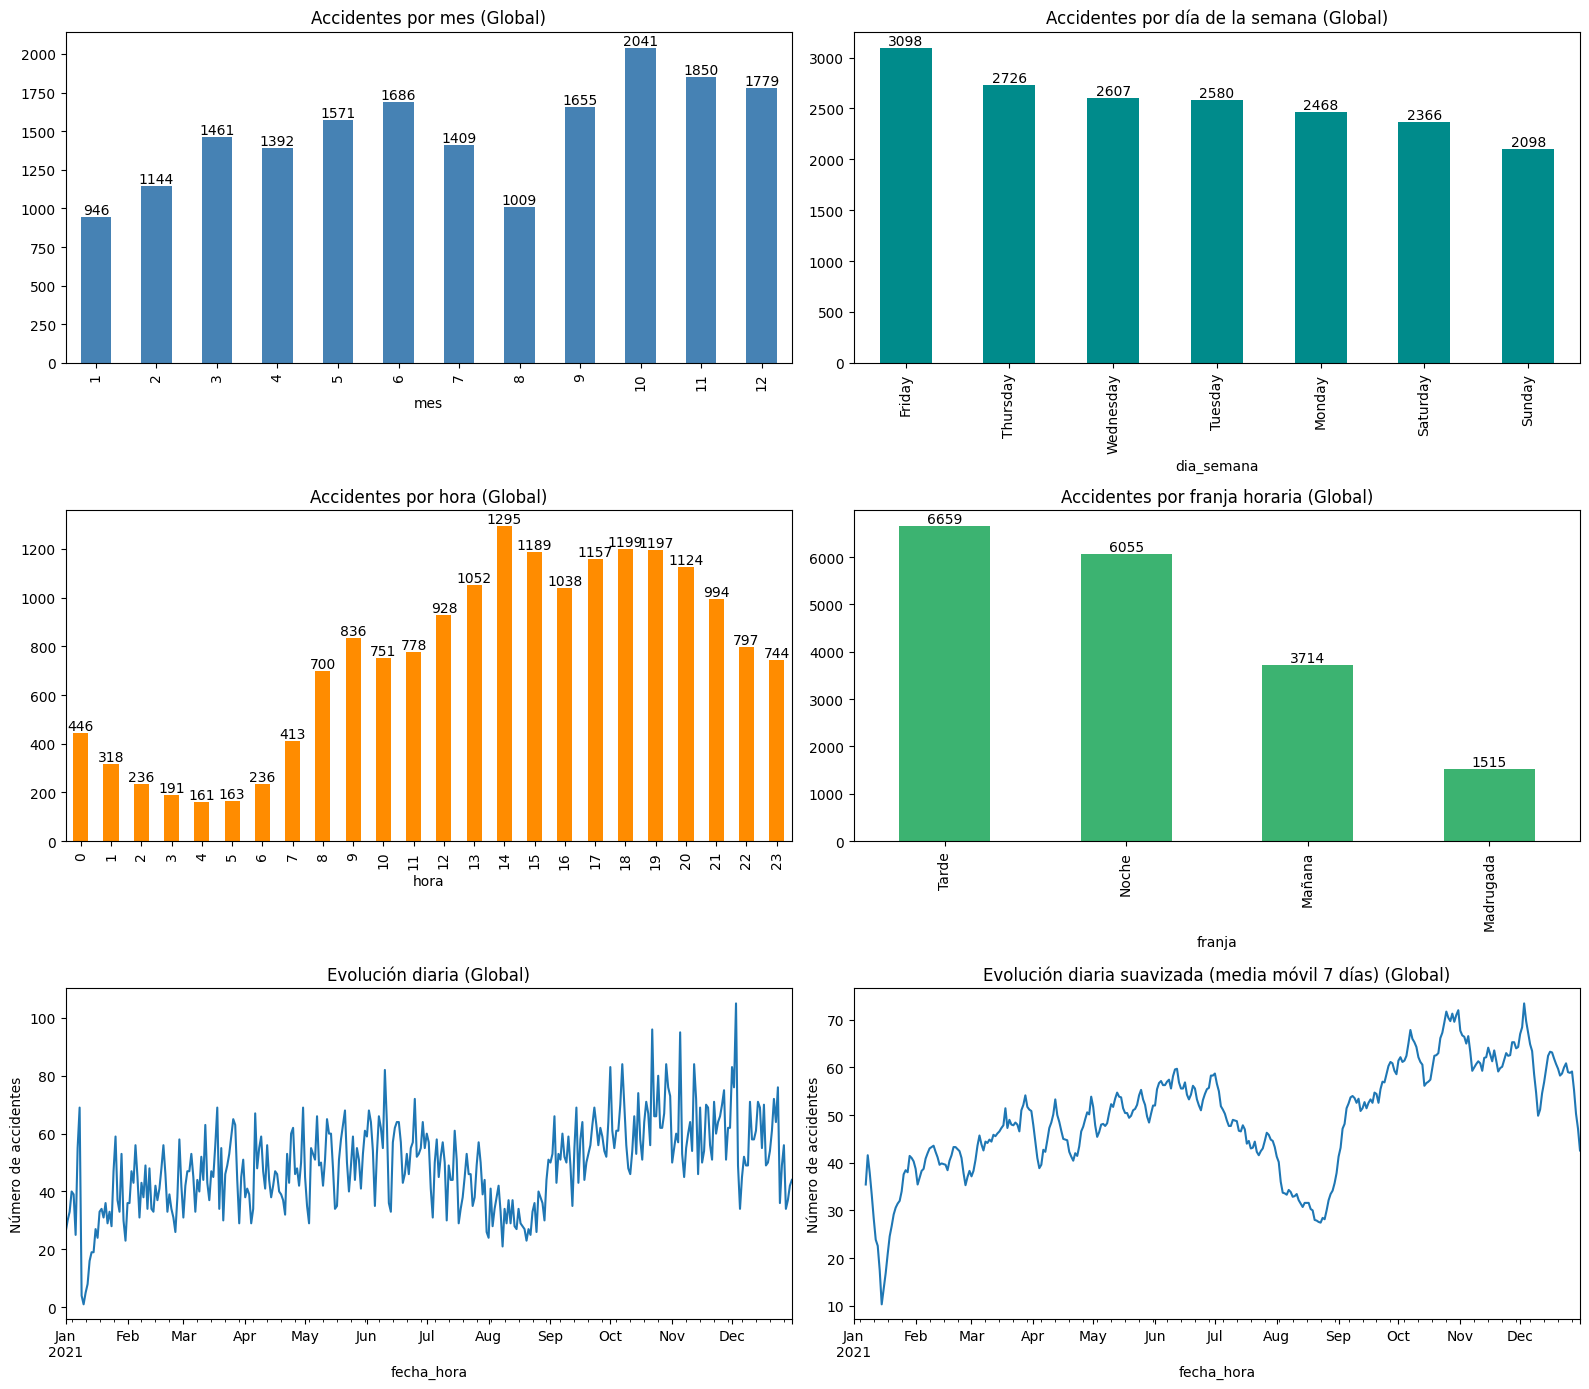

In [30]:
plot_temporal_univariate(df_21_unicos)

In [31]:
#FIGURA 1 (VERSIÓN 2)
#Función de variables temporales (versión 2):

def plot_temporal_univariate_2(df, col_datetime='fecha_hora', por_año=False):
    """
    Gráficos temporales univariantes:
    - Accidentes por mes (barras)
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Curva mensual ampliada (línea con puntos)
    - Curvas diarias por mes (12 gráficas adicionales)
    """

    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")


def _graficos(df, col_datetime, titulo_extra=""):

    plt.rcParams.update({'font.size': 12})
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.linewidth'] = 1.5

    fig_1 = plt.figure(figsize=(16, 18))

    # 1. Accidentes por mes
    ax_mes = plt.subplot2grid((3, 2), (0, 0))
    freq_mes = (df['mes'].value_counts(normalize=True)*100).sort_index().round(2)
    freq_mes.plot(kind='bar', ax=ax_mes, color="steelblue",
                  title=f'Accidentes por mes ({titulo_extra})')
    ax_mes.set_xlabel("Mes")
    ax_mes.set_ylabel("Número de accidentes")
    ax_mes.bar_label(ax_mes.containers[0])
    total=len(df)
    ax_mes.text(
    0.5, 0.95, f'Total: {total} accidentes únicos', 
    transform=ax_mes.transAxes, 
    ha='right', va='top', fontsize=14)
    ax_mes.text(0.95,0.93,"(a)", transform=ax_mes.transAxes, fontsize=16)
    ax_mes.set_ylim(0,12)

    # 2. Accidentes por día de la semana
    dias_es = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    map_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}
    df['dia_semana_es'] = df['dia_semana'].map(map_dias)

    ax_semana = plt.subplot2grid((3, 2), (0, 1))
    freq_semana = (df['dia_semana_es'].value_counts(normalize=True)*100).reindex(dias_es).round(2)
    freq_semana.plot(kind='bar', ax=ax_semana, color="gold",
                     title=f'Accidentes por día de la semana ({titulo_extra})')
    ax_semana.set_xlabel("Día de la semana")
    ax_semana.set_ylabel("Frecuencia (%)")
    ax_semana.bar_label(ax_semana.containers[0])
    ax_semana.text(0.95,0.93,"(b)", transform=ax_semana.transAxes, fontsize=16)
    ax_semana.set_ylim(0,20)

    # 3. Accidentes por hora
    ax_hora = plt.subplot2grid((3, 2), (1, 0))
    freq_hora = (df['hora'].value_counts(normalize=True)*100).sort_index().round(1)
    freq_hora.plot(kind='bar', ax=ax_hora, color="darkorange",
                   title=f'Accidentes por hora ({titulo_extra})')
    ax_hora.set_xlabel("Hora")
    ax_hora.set_ylabel("Frecuencia (%)")
    ax_hora.bar_label(ax_hora.containers[0])
    ax_hora.text(0.95,0.93,"(c)", transform=ax_hora.transAxes, fontsize=16)
    ax_hora.set_ylim(0,8)

    # 4. Accidentes por franja horaria
    orden_franjas = ["Madrugada", "Mañana", "Tarde", "Noche"]

    ax_franja = plt.subplot2grid((3, 2), (1, 1))
    freq_franja = (df['franja'].value_counts(normalize=True)*100).reindex(orden_franjas, fill_value=0).round(2)
    freq_franja.plot(kind='bar', ax=ax_franja, color="mediumseagreen",
                     title=f'Accidentes por franja horaria ({titulo_extra})')
    ax_hora.set_xlabel("Franja horaria")
    ax_franja.set_ylabel("Frecuencia (%)")
    ax_franja.bar_label(ax_franja.containers[0])
    ax_franja.text(0.95,0.93,"(d)", transform=ax_franja.transAxes, fontsize=16)
    ax_franja.set_ylim(0,40)

    # 5. Curva mensual ampliada
    ax_curva = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    frecuencia_mensual = df[col_datetime].dt.month.value_counts().sort_index()

    meses_es = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ]
    meses_plot = [meses_es[i-1] for i in frecuencia_mensual.index]

    ax_curva.plot(
        meses_plot, frecuencia_mensual.values,
        marker="o", linewidth=3, color="darkred"
    )
    ax_curva.set_title(f"Curva de frecuencia mensual ({titulo_extra})", fontsize=16)
    ax_curva.set_xlabel("Mes")
    ax_curva.set_ylabel("Número de accidentes")
    ax_curva.grid(True)
    for i, v in enumerate(frecuencia_mensual.values):
        ax_curva.text(i, v + 45, str(v), ha="center", fontsize=12)
    ax_curva.tick_params(axis="x", rotation=45)
    plt.ylim(750, 2250)
    ax_curva.text(0.97,0.93,"(e)", transform=ax_curva.transAxes, fontsize=16)



    plt.tight_layout()
    plt.show()

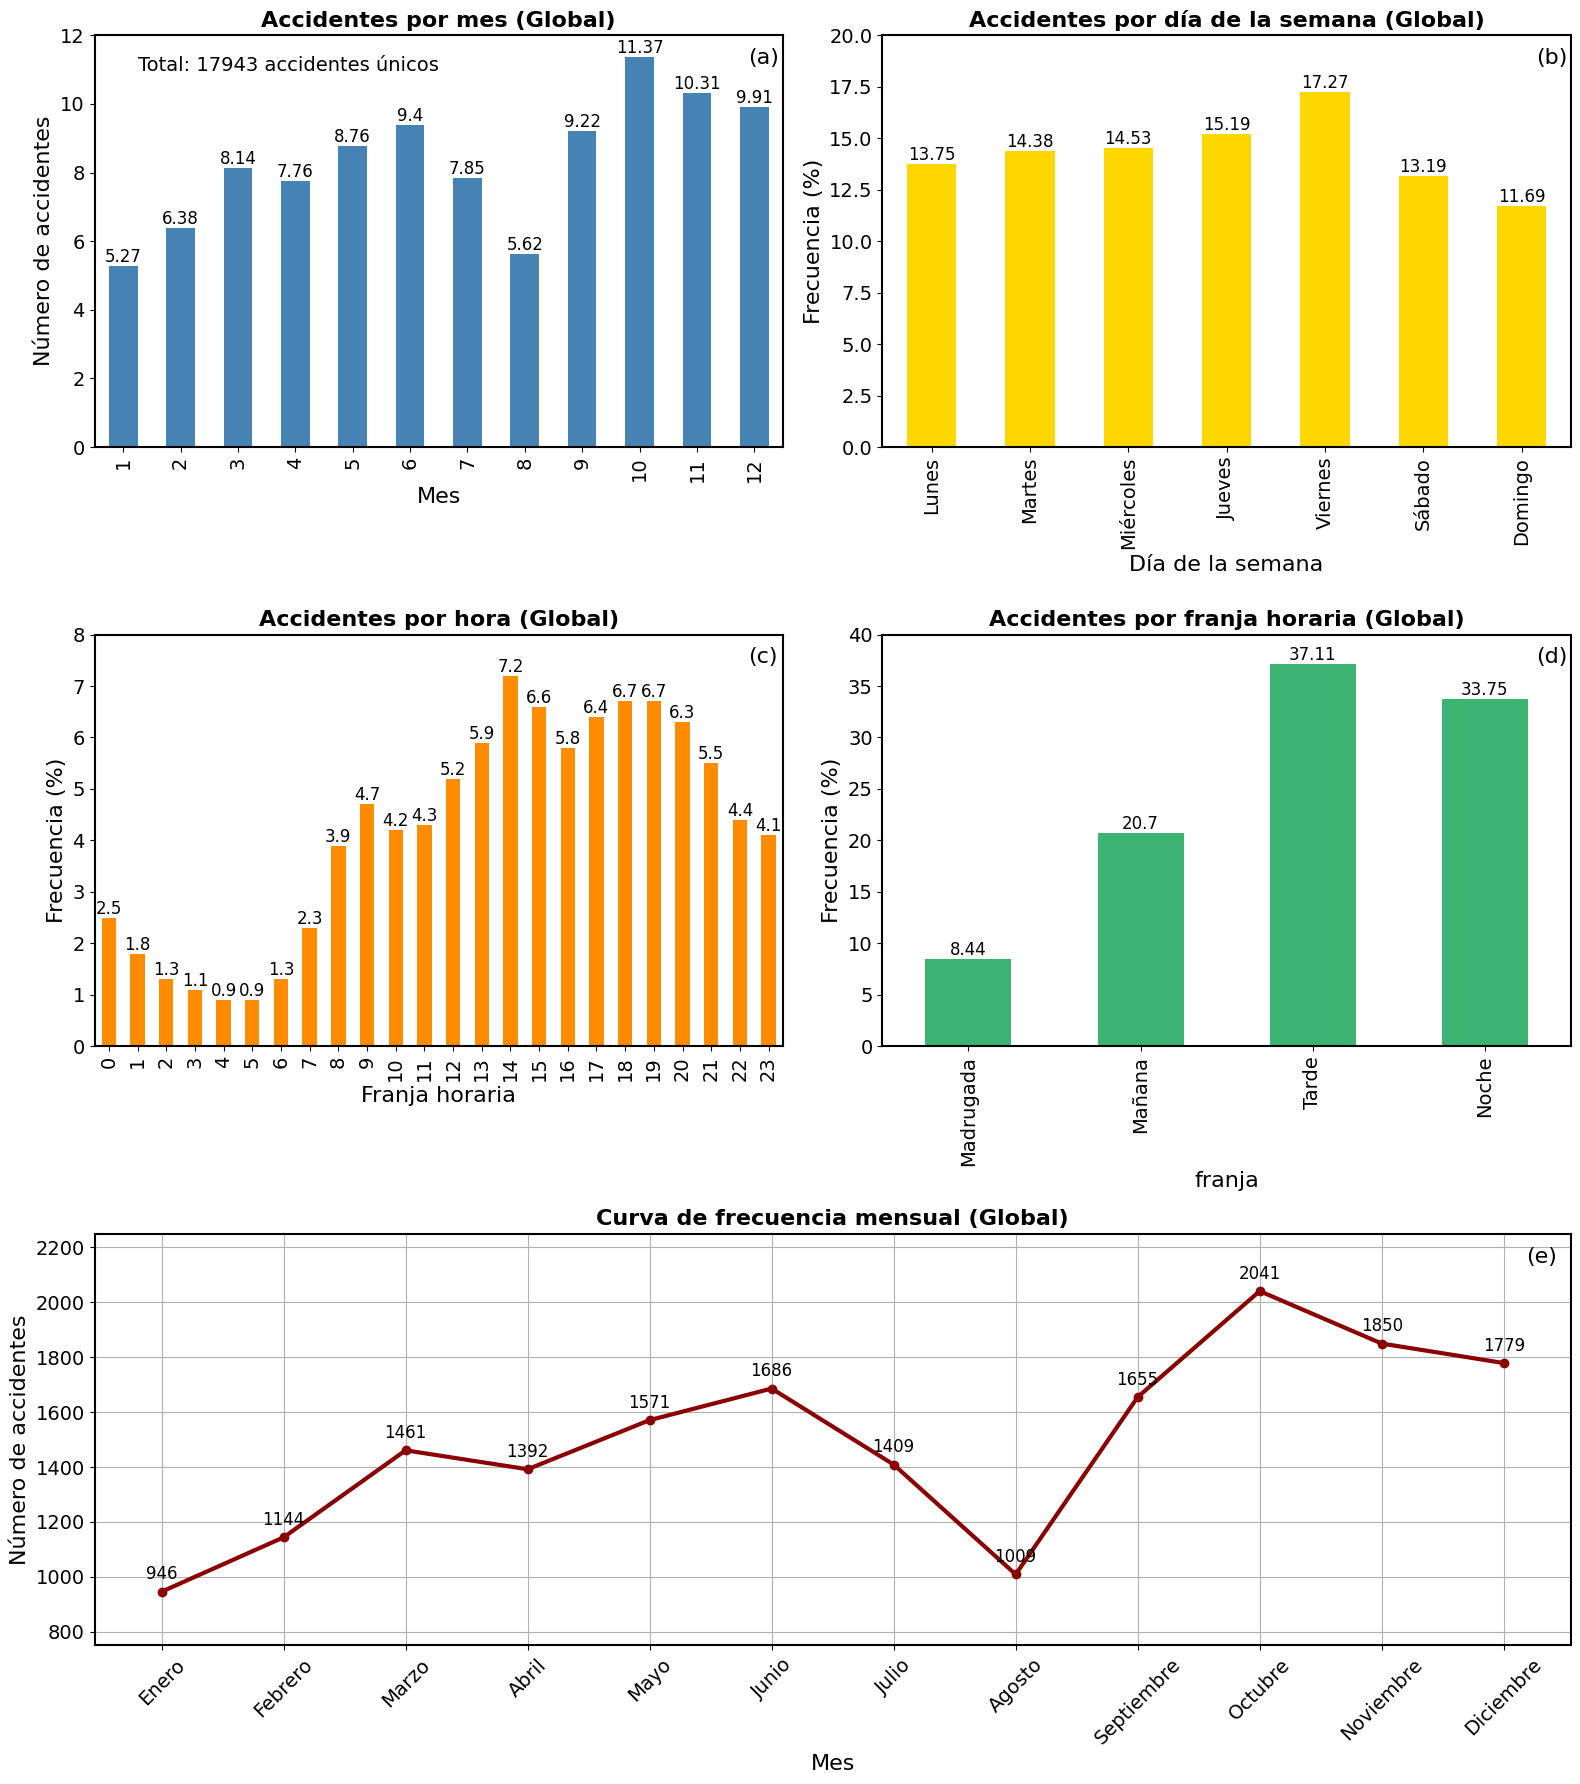

In [32]:
plot_temporal_univariate_2(df_21_unicos)

### Análisis geográfico

Generamos un función que normalizá datos geográficos (localizació y número) para identificar las ubicaciones con mayor siniestralidad (puntos negros):

In [33]:
#Funcion de normalización:


# 1. Funciones de normalización
def normalize_text(s):
    """Normaliza texto: minúsculas, espacios, sin tildes."""
    if pd.isna(s):
        return None
    s = s.lower().strip()
    s = " ".join(s.split())  # elimina dobles espacios
    s = ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
    return s

def normalize_numero(n):
    """Normaliza número de portal, detecta S/N."""
    if pd.isna(n):
        return None
    n = str(n).lower().strip()
    if n in ['s/n', 'sn', 's-n', '']:
        return None
    return n

# 2. Normalización de columnas clave
df = df_21

df['localizacion_norm'] = df['localizacion'].apply(normalize_text)
df['numero_norm'] = df['numero'].apply(normalize_numero)
df['num_expediente'] = df['num_expediente'].astype(str).str.strip()

# eliminar duplicados exactos de num expediente
df = df.drop_duplicates(subset=['num_expediente'])


# 3. Construcción de clave de localización final
df['clave_localizacion'] = (
    df['localizacion_norm'].fillna('') + 'n' +
    df['numero_norm'].fillna('')
).str.strip()

# 4. Detección de puntos negros con distrito
puntos_negros = (
    df.groupby(['localizacion_norm', 'distrito'])['num_expediente']
      .nunique()
      .reset_index(name='n_expedientes')
      .sort_values('n_expedientes', ascending=False)
)

# filtrar solo localizaciones con más de un accidente distinto
puntos_negros = puntos_negros[puntos_negros['n_expedientes'] > 1]

# 5. Resultado final
puntos_negros

C:\Users\aquin\AppData\Local\Temp\ipykernel_16304\3404845030.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['localizacion_norm', 'distrito'])['num_expediente']


localizacion_norm            distrito  \
12558                       autov. m-30, +01100i          ARGANZUELA   
5009                              autov. m-23, 0           MORATALAZ   
993                          autov. a-2, +00500e       CIUDAD LINEAL   
2942                        autov. a-42, +00500s         CARABANCHEL   
2936                        autov. a-42, +00500e               USERA   
...                                          ...                 ...   
69667                      avda. valdemarin, 165     MONCLOA-ARAVACA   
282366                         ronda. toledo, 18          ARGANZUELA   
1692                         autov. a-3, +00700s  PUENTE DE VALLECAS   
282558  ronda. valencia / call. meson de paredes              CENTRO   
283195                             trva. vino, 1     MONCLOA-ARAVACA   

        n_expedientes  
12558              32  
5009               21  
993                18  
2942               18  
2936               18  
...               ...  
69667               2  
282366              2  
1692                2  
282558              2  
283195              2  

[2376 rows x 3 columns]

Dibujamos la frecuencia de accidentes por distrito y los 3 puntos negros (Figura 2):

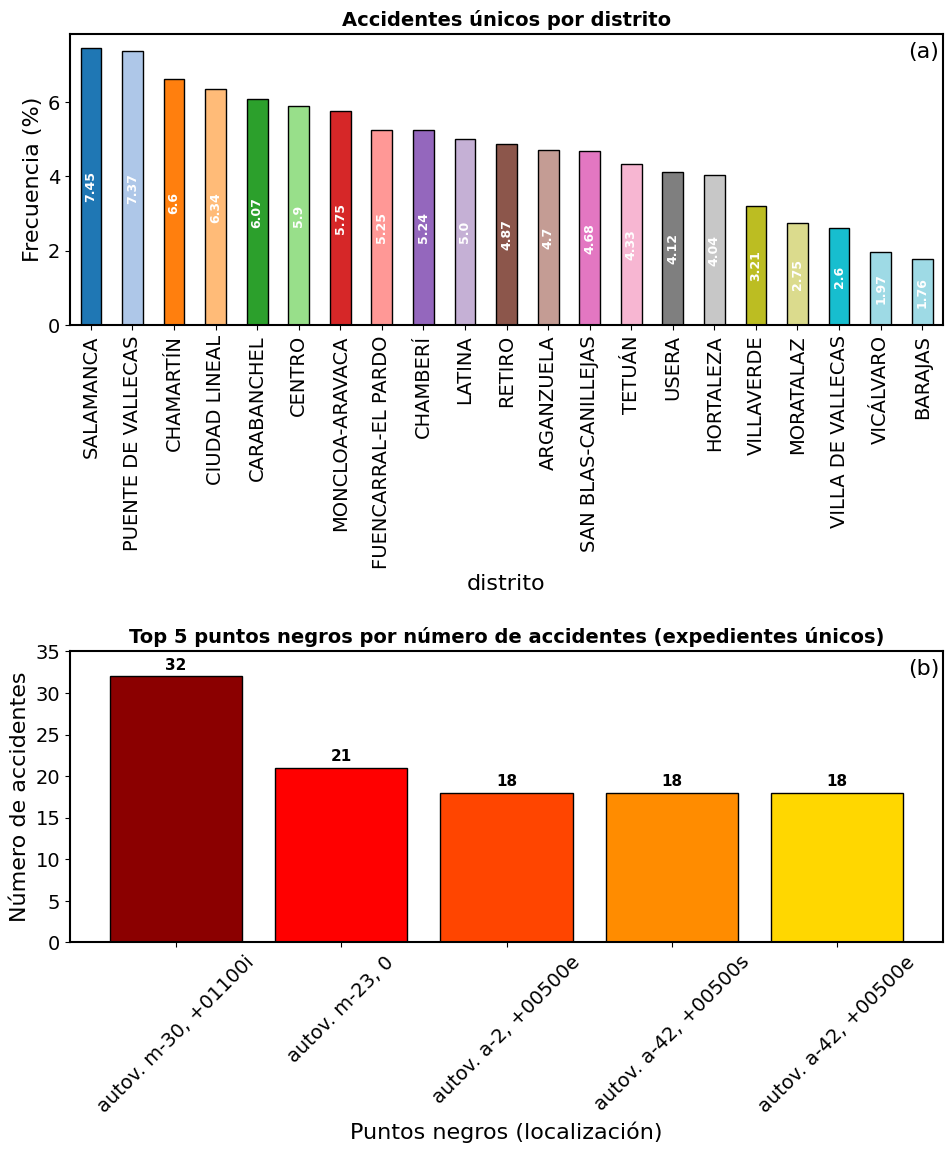

In [34]:
#FIGURA 2

plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5


fig_2 = plt.figure(figsize=(10, 12))

accidentes_distrito=(df_21_unicos["distrito"].value_counts(normalize = True)*100).round(2)
colores_distritos = plt.cm.tab20(range(len(accidentes_distrito)))

ax1=plt.subplot(2, 1, 1)
ax1=accidentes_distrito.plot(kind="bar", color=colores_distritos, ax =ax1, edgecolor='black')

ax1.set_title("Accidentes únicos por distrito", fontweight='bold')
ax1.set_ylabel("Frecuencia (%)")

for p, value in zip(ax1.patches, accidentes_distrito):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax1.annotate(
        f"{value}",
        (x, y),
        ha="center", va="center",
        rotation=90,          #  texto tumbado
        fontsize=9, color="white", fontweight="bold"
    )
ax1.text(0.96, 0.92, '(a)', transform=ax1.transAxes, fontsize=16)

# Seleccionar los 5 puntos negros con más accidentes
top5 = puntos_negros.nlargest(5, 'n_expedientes').copy()

# Resetear índice para evitar problemas de posición
top5 = top5.reset_index(drop=True)

ax2 = plt.subplot(2,1,2)

paleta_top5 = ["#8B0000", "#FF0000", "#FF4500", "#FF8C00", "#FFD700"]
bars2 = ax2.bar(top5['localizacion_norm'], top5['n_expedientes'], 
                color=paleta_top5, edgecolor='black', linewidth=1)

ax2.set_title('Top 5 puntos negros por número de accidentes (expedientes únicos)')
ax2.set_xlabel("Puntos negros (localización)")
ax2.set_ylabel("Número de accidentes")
ax2.tick_params(axis="x", rotation=45)
ax2.text(0.96, 0.92, '(b)', transform=ax2.transAxes, fontsize=16)
ax2.bar_label(bars2, padding=3, fontweight='bold', fontsize=11)
ax2.set_ylim(0,35)
plt.tight_layout(pad=2.0)
plt.show()


### Análisis demográfico

Gráficamos las frecuencias de accidentes en función de datos demográficos: rango de edad, sexo y tipo de persona

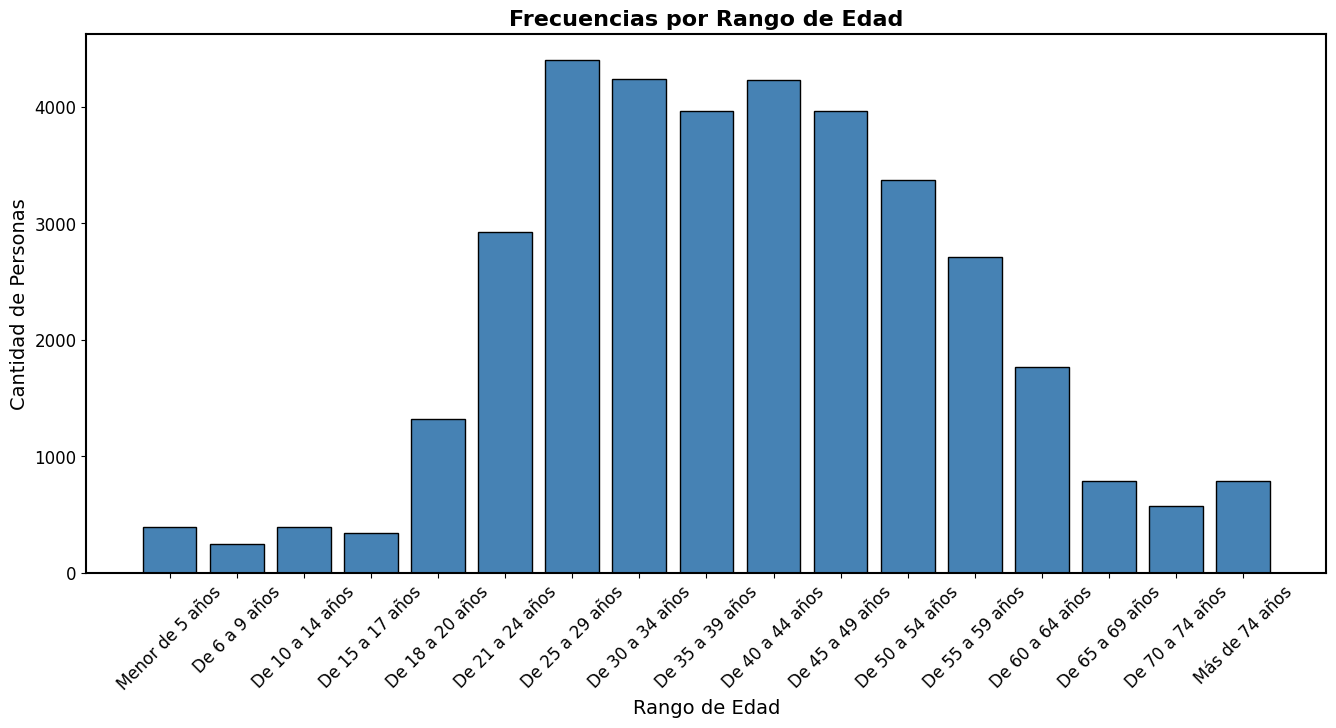

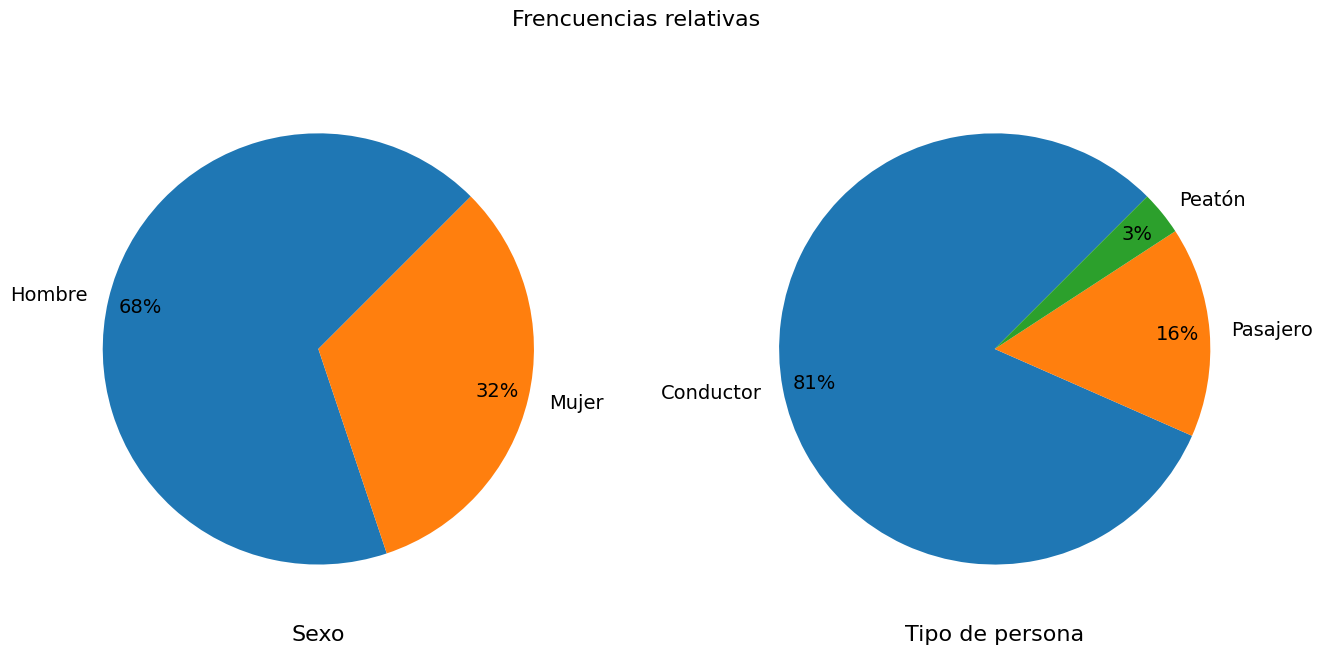

In [35]:
#FIGURA 3 (VERSIÓN 1)
#Sintaxis de python
#Orden correcto de rangos de edad 

edades=df_21.rango_edad.value_counts().sort_index()
fig_3a=plt.figure(figsize=(16,7))
plt.bar(edades.index, edades, color="steelblue", edgecolor="black")
plt.title("Frecuencias por Rango de Edad", fontsize=16) 
plt.xlabel("Rango de Edad", fontsize=14)
plt.ylabel("Cantidad de Personas", fontsize=14)
plt.xticks(fontsize=12, rotation=45) # Rotación por si los nombres son largos
plt.yticks(fontsize=12);

fig_3b, axs=plt.subplots(1, 2, figsize=(16, 7))
pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 14}, # Aumenta tamaño de letra (porcentajes y etiquetas)
    'pctdistance': 0.85,           # Posición de los porcentajes (0=centro, 1=borde)
    'labeldistance': 1.1           # Posición de los nombres (1.1 está justo afuera)
}
fig_3b.suptitle("Frencuencias relativas", fontsize=16)
axs[0].set_xlabel("Sexo")
sexo_counts= df_21.sexo.value_counts(normalize=True).drop("Desconocido", errors='ignore')
axs[0].pie(sexo_counts, 
           labels=sexo_counts.index,**pie_kwargs)
axs[1].set_xlabel("Tipo de persona")
axs[1].pie(df_21.tipo_persona.value_counts(normalize=True)*100, 
           labels=df_21.tipo_persona.value_counts().index,**pie_kwargs);


C:\Users\aquin\AppData\Local\Temp\ipykernel_16304\1613772913.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sexo_counts = df_21.groupby('tipo_persona')['sexo'].value_counts(normalize=True)\


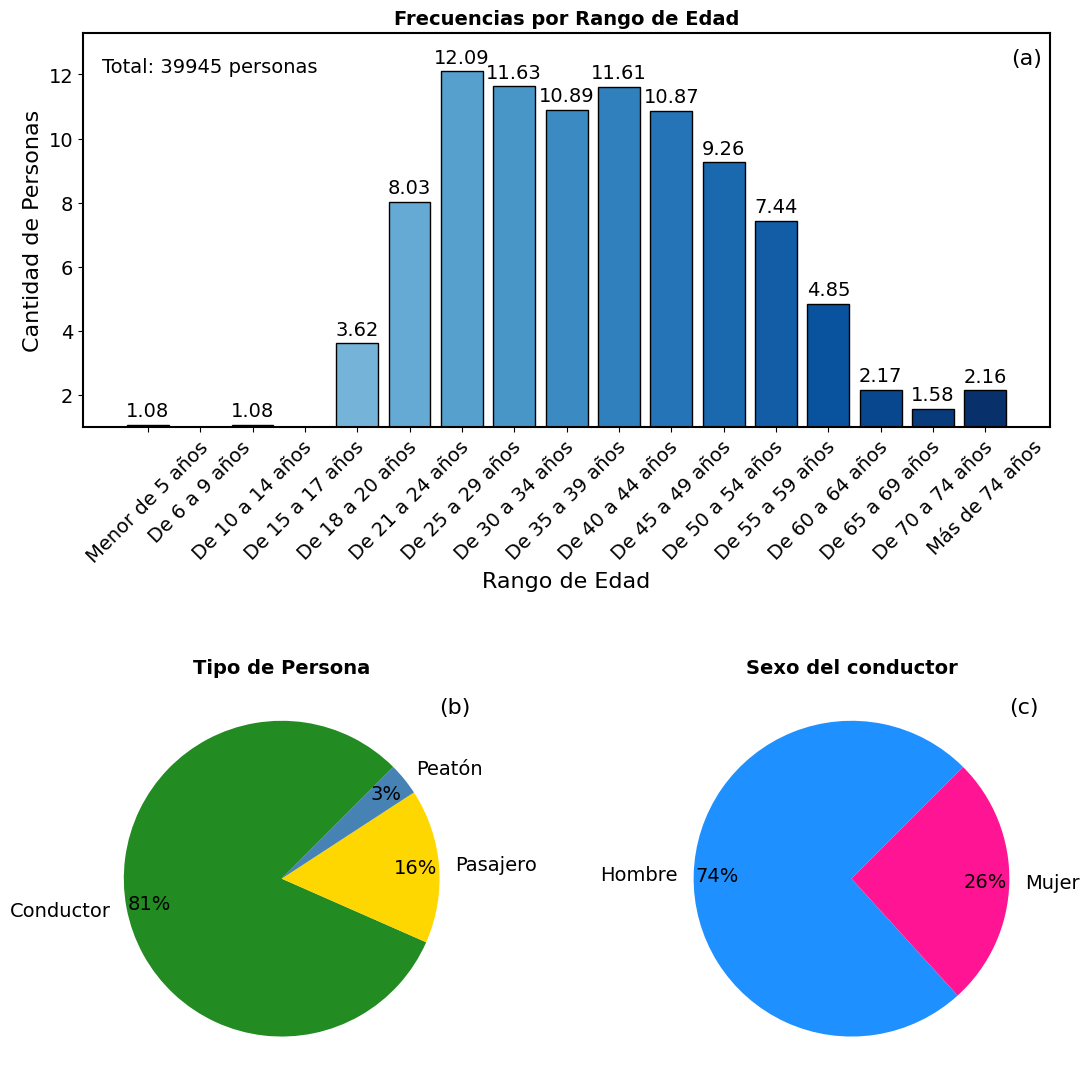

In [36]:
#ANÁLISIS DEMOGRÁFICO
#FIGURA 3 (VERSIÓN 2)


edad_counts = (df_21.rango_edad.value_counts(normalize=True)*100).drop("Desconocido", errors="ignore").sort_index().round(2)
sexo_counts = df_21.groupby('tipo_persona')['sexo'].value_counts(normalize=True)\
    .loc['Conductor'].drop("Desconocido", errors='ignore') #Contabilizamos únicamente el sexo de los conductores
tipo_counts = df_21.tipo_persona.value_counts(normalize=True)

plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5

fig_3 = plt.figure(figsize=(12, 12))


ax1 = plt.subplot(2, 1, 1) #ocupa todo el ancho
colores=plt.cm.Blues(np.linspace(0.3,1,len(edades)))
bars=ax1.bar(edad_counts.index, edad_counts, color=colores, edgecolor="black")
ax1.set_title("Frecuencias por Rango de Edad") 
ax1.set_xlabel("Rango de Edad")
ax1.set_ylabel("Cantidad de Personas")
ax1.bar_label(bars, padding=3, fontsize=14)
total_involucrados=len(df_21)
ax1.text(0.02, 0.90, f"Total: {total_involucrados} personas",
         transform=ax1.transAxes, fontsize=14)
plt.xticks(rotation=45)
#lt.yticks(fontsize=14)
max_val = edad_counts.max()
ax1.set_ylim(bottom=1, top=max_val * 1.1)
ax1.text(0.96, 0.92, '(a)', transform=ax1.transAxes, fontsize=16)

pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 14},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

ax2 = plt.subplot(2, 2, 3) # Fila 1, Columna 2
ax2.pie(tipo_counts, labels=tipo_counts.index, colors=["forestgreen", "gold", "steelblue"], **pie_kwargs)
ax2.set_title("Tipo de Persona")
ax2.text(0.9, 0.92, '(b)', transform=ax2.transAxes, fontsize=16)

ax3 = plt.subplot(2, 2, 4) # Fila 1, Columna 1
ax3.pie(sexo_counts, labels=sexo_counts.index, colors=["dodgerblue", "deeppink"], **pie_kwargs)
ax3.set_title("Sexo del conductor")
ax3.text(0.9, 0.92, '(c)', transform=ax3.transAxes, fontsize=16)


plt.tight_layout(pad=4.0) #para que no se solapen
# plt.show()

### Factores asociados al accidente

Gráficamos las frecuencias de accidente por tipos de factores asociados al accidente:

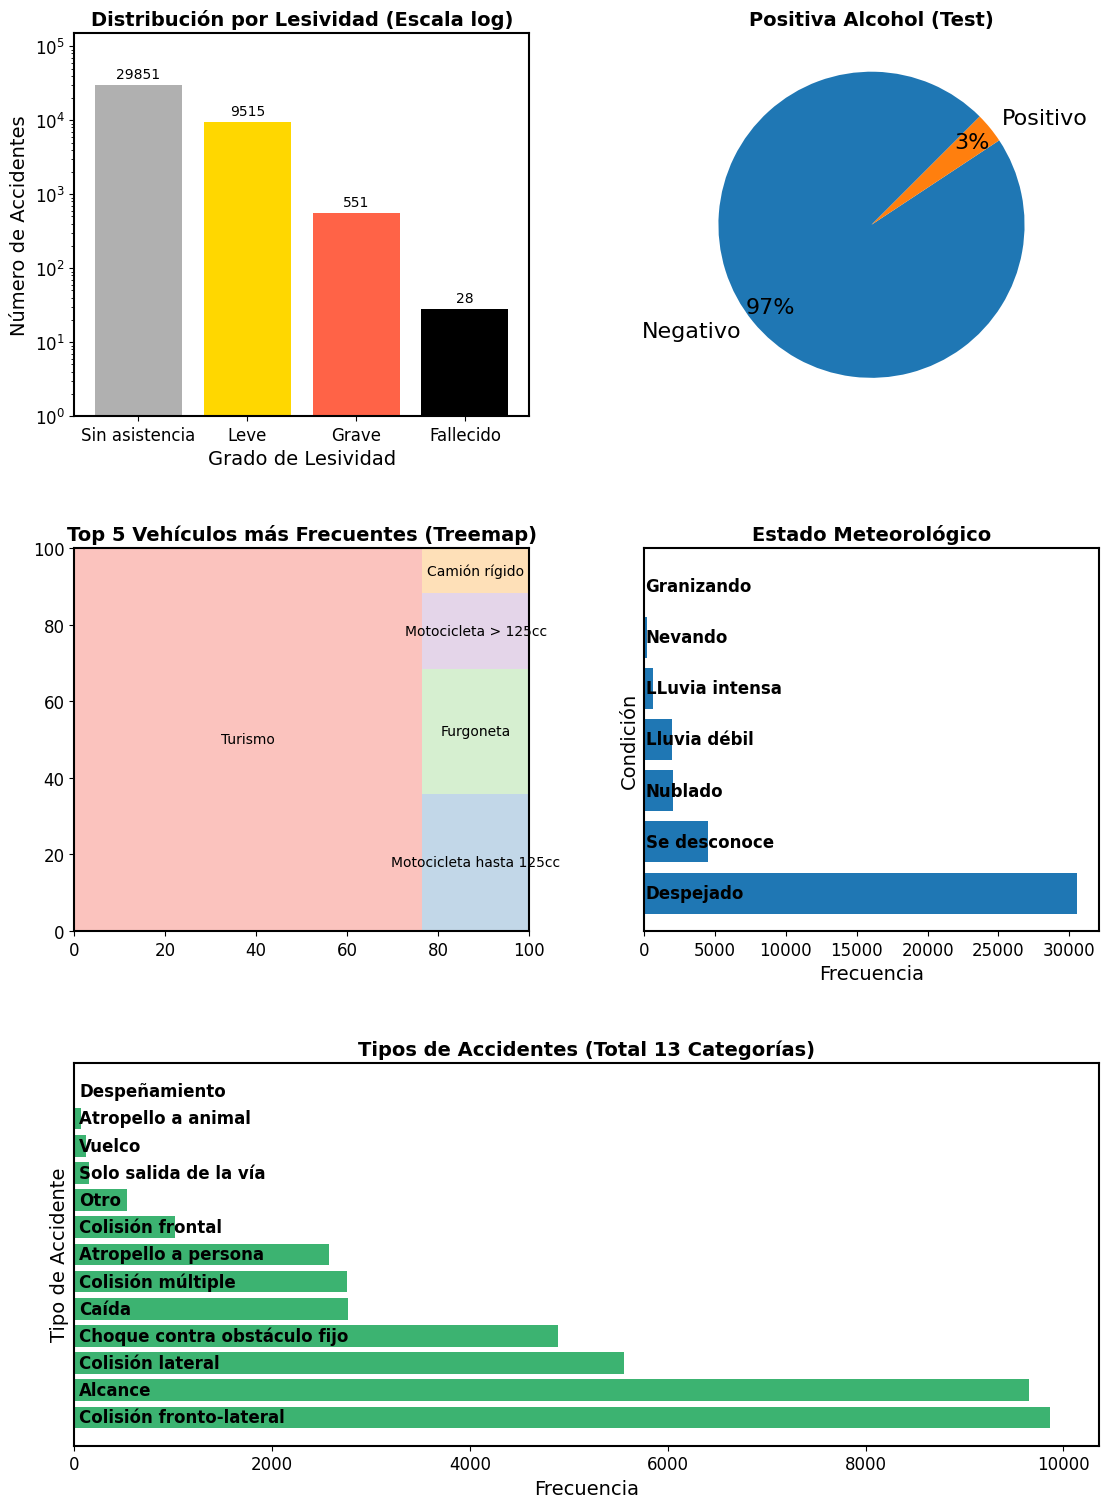

In [37]:
# FIGURA 4 (VERSIÓN 1)
# Variables: lesividad, tipo_accidente, tipo_vehiculo, estado_meteorológico, positiva_alcohol
# Bar Chart: Para tipo_accidente y tipo_vehiculo. 
# Treemap: Si tienes muchas categorías en tipo_vehiculo,un Treemap ayuda a ver visualmente cuáles predominan. 
# Waffle Chart: Muy visual para positiva_alcohol (ej. cuántos de cada 100 dieron positivo).


fig_4 = plt.figure(figsize=(12, 16))

plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

lesividad_counts=df_21.lesividad.value_counts()
lesividad_counts=lesividad_counts.rename({"Sin asistencia sanitaria": "Sin asistencia"})
alcohol_counts=df_21.positiva_alcohol.value_counts().drop("No consta", errors="ignore")
vehiculo_counts=df_21.tipo_vehiculo.value_counts().nlargest(5)
meteo_counts=df_21.estado_meteorológico.value_counts()
tipo_counts=df_21.tipo_accidente.value_counts()

ax1=plt.subplot(3,2,1)
ax1.set_title("Distribución por Lesividad (Escala log)", fontweight='bold')
colores_lesividad = ['#B0B0B0', '#FFD700', '#FF6347', '#000000']
bars=ax1.bar(lesividad_counts.index, lesividad_counts, color=colores_lesividad )
ax1.set_yscale("log")
ax1.set_xlabel('Grado de Lesividad', fontsize=14)
ax1.set_ylabel('Número de Accidentes', fontsize=14)

ax1.bar_label(bars, padding=3, fontsize=10)
max_val = lesividad_counts.max()
ax1.set_ylim(bottom=1, top=max_val * 5)

pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 16},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

ax2=plt.subplot(3,2,2)
ax2.set_title('Positiva Alcohol (Test)', fontweight='bold')
ax2.pie(alcohol_counts, labels=alcohol_counts.index, **pie_kwargs)

ax3=plt.subplot(3,2,3)
ax3.set_title('Top 5 Vehículos más Frecuentes (Treemap)', fontweight='bold')
squarify.plot(sizes=vehiculo_counts.values, label=vehiculo_counts.index, 
              alpha=0.8, ax=ax3, color=plt.cm.Pastel1.colors)

ax4=plt.subplot(3,2,4)
ax4.set_title('Estado Meteorológico', fontweight='bold')
bars4=ax4.barh(meteo_counts.index, meteo_counts)
ax4.set_xlabel('Frecuencia', fontsize=14)
ax4.set_ylabel('Condición', fontsize=14)
ax4.set_yticks([])

for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(100, i, 
             meteo_counts.index[i], 
             fontsize=12, 
             va='center',     # Centrado verticalmente respecto al grosor de la barra
             ha='left',       # Alineado a la izquierda
             fontweight='bold')   

ax5 = plt.subplot(3,1,3) 
bars5 = ax5.barh(tipo_counts.index, tipo_counts, color='mediumseagreen')
ax5.set_title('Tipos de Accidentes (Total 13 Categorías)', fontweight='bold')
ax5.set_xlabel('Frecuencia', fontsize=14)
ax5.set_ylabel('Tipo de Accidente', fontsize=14)
ax5.set_yticks([])
for i, bar in enumerate(bars5):
    width = bar.get_width()
    ax5.text(50, i, 
             tipo_counts.index[i], 
             fontsize=12, 
             va='center',     # Centrado verticalmente respecto al grosor de la barra
             ha='left',       # Alineado a la izquierda
             fontweight='bold')   
plt.tight_layout(pad=4.0) # Para que no se solapen los títulos


C:\Users\aquin\AppData\Local\Temp\ipykernel_16304\2500449862.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehiculo_counts=df_21.groupby("tipo_persona")["tipo_vehiculo"].value_counts() \
C:\Users\aquin\AppData\Local\Temp\ipykernel_16304\2500449862.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alcohol_counts=df_21.groupby("tipo_persona")["positiva_alcohol"].value_counts() \
C:\Users\aquin\AppData\Local\Temp\ipykernel_16304\2500449862.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matp

<Figure size 1200x1600 with 0 Axes>

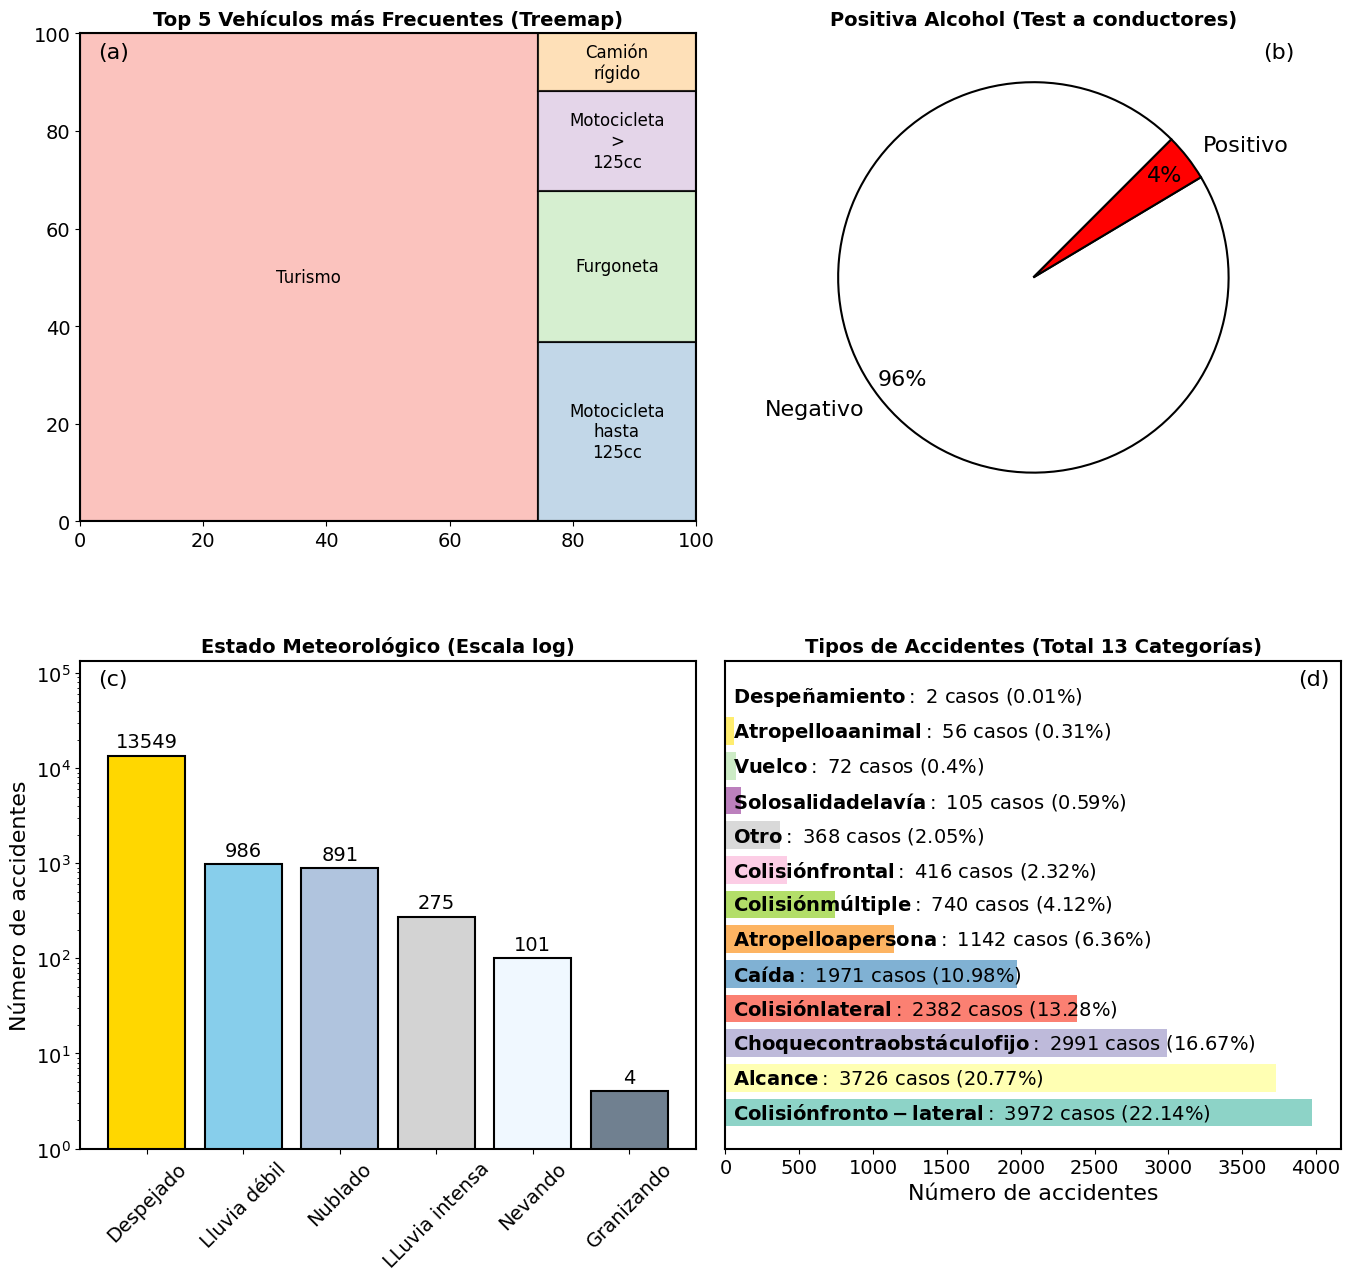

In [38]:
# FIGURA 4 (VERSIÓN 2)
# Variables: lesividad, tipo_accidente, tipo_vehiculo, estado_meteorológico, positiva_alcohol
# Bar Chart: Para tipo_accidente y tipo_vehiculo. 
# Treemap: Si tienes muchas categorías en tipo_vehiculo,un Treemap ayuda a ver visualmente cuáles predominan. 
# Waffle Chart: Muy visual para positiva_alcohol (ej. cuántos de cada 100 dieron positivo).

import matplotlib.cm as cm

fig_4 = plt.figure(figsize=(12, 16))

plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5


vehiculo_counts=df_21.groupby("tipo_persona")["tipo_vehiculo"].value_counts() \
    .loc["Conductor"].nlargest(5)
alcohol_counts=df_21.groupby("tipo_persona")["positiva_alcohol"].value_counts() \
    .loc["Conductor"].drop("No consta", errors="ignore")
meteo_counts=df_21_unicos.estado_meteorológico.value_counts().drop(["Se desconoce", "No consta"], errors="ignore")
tipo_counts=df_21_unicos.tipo_accidente.value_counts()
tipo_counts_normalizado=(df_21_unicos.tipo_accidente.value_counts(normalize=True)*100).round(2)




pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 16},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

wedge_props = {
    'edgecolor': 'black', # Color de la línea de separación
    'linewidth': 1.5,# Grosor de la línea
    'antialiased': True
}

fig_4 = plt.figure(figsize=(14, 18)) 


ax1 = plt.subplot(3, 2, 1) # (3 filas, 1 columna, posición 2)
ax1.set_title('Top 5 Vehículos más Frecuentes (Treemap)', fontweight='bold')
labels_con_salto = [label.replace(" ", "\n") for label in vehiculo_counts.index]
squarify.plot(sizes=vehiculo_counts.values, label=labels_con_salto, 
              alpha=0.8, ax=ax1, color=plt.cm.Pastel1.colors, edgecolor="black", linewidth=1.5, pad=False)
ax1.text(0.03, 0.95, '(a)', transform=ax1.transAxes, fontsize=16)


#ax1.axis('off') # El treemap no necesita ejes

ax2 = plt.subplot(3, 2, 2)
ax2.set_title('Positiva Alcohol (Test a conductores)', fontweight='bold')
colores_alcohol = ["white", "red"]
ax2.pie(alcohol_counts, labels=alcohol_counts.index, colors=colores_alcohol, wedgeprops=wedge_props, **pie_kwargs)
ax2.text(0.97, 0.95, '(b)', transform=ax2.transAxes, fontsize=16)

ax3 = plt.subplot(3, 2, 3)
ax3.set_title('Estado Meteorológico (Escala log)', fontweight='bold')
mapa_colores_meteo = {
    'Despejado': '#FFD700',
    'Nublado': '#B0C4DE',
    'Lluvia débil': '#87CEEB',
    'Lluvia intensa': '#4682B4',
    'Nevando': '#F0F8FF',
    'Granizando': '#708090'
}
colores_para_grafico = [mapa_colores_meteo.get(cat, '#D3D3D3') for cat in meteo_counts.index]
bars3 = ax3.bar(meteo_counts.index, meteo_counts, color=colores_para_grafico, linewidth=1.5, edgecolor='black') 
ax3.set_yscale("log")
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('Número de accidentes')
ax3.bar_label(bars3, padding=3, fontsize=14)
max_val = meteo_counts.max()
ax3.set_ylim(bottom=1, top=max_val * 10)
ax3.text(0.03, 0.95, '(c)', transform=ax3.transAxes, fontsize=16)

ax4 = plt.subplot(3, 2, 4) 
colores_accidentes = cm.get_cmap('Set3')(range(13))
bars4 = ax4.barh(tipo_counts.index, tipo_counts, color=colores_accidentes)
ax4.set_title('Tipos de Accidentes (Total 13 Categorías)', fontweight='bold')
ax4.set_xlabel("Número de accidentes")
ax4.set_yticks([])
ax4.text(0.93, 0.95, '(d)', transform=ax4.transAxes, fontsize=16)

for i, bar in enumerate(bars4):
    #texto_etiqueta = f"{tipo_counts.index[i]}: {tipo_counts.values[i]} casos"
    texto = f"$\\mathbf{{{tipo_counts.index[i]}}}:$ {tipo_counts.values[i]} casos ({tipo_counts_normalizado[i]}%)"
    ax4.text(50, i, texto, fontsize=14, va='center', ha='left')

plt.tight_layout(pad=1.0)
plt.show();

### Grado de Lesividad

Por último, dibujamos las frecuencias de accidente en función del grado de lesividad (variable más importante)

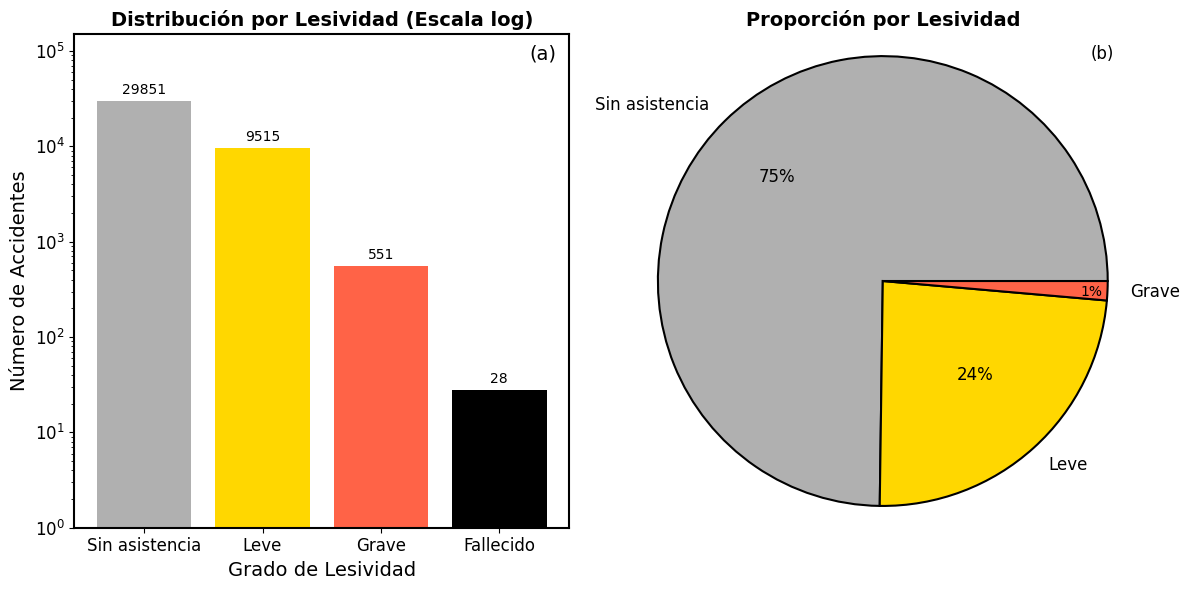

In [39]:
#FIGURA 5

fig_5 = plt.figure(figsize=(12, 6))

plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

lesividad_counts=df_21.lesividad.value_counts().rename({"Sin asistencia sanitaria": "Sin asistencia"})
Lesividad_sin_fallecido=lesividad_counts.drop(["Fallecido"], errors="ignore")



ax1=plt.subplot(1,2,1)
ax1.set_title("Distribución por Lesividad (Escala log)", fontweight='bold')
colores_lesividad = ['#B0B0B0', '#FFD700', '#FF6347', '#000000']
bars=ax1.bar(lesividad_counts.index, lesividad_counts, color=colores_lesividad )
ax1.set_yscale("log")
ax1.set_xlabel('Grado de Lesividad', fontsize=14)
ax1.set_ylabel('Número de Accidentes', fontsize=14)

ax1.bar_label(bars, padding=3, fontsize=10)
max_val = lesividad_counts.max()
ax1.set_ylim(bottom=1, top=max_val * 5)
ax1.text(0.92, 0.95, '(a)', transform=ax1.transAxes, fontsize=14)

# pie_kwargs = {
#     'autopct': '%1.0f%%',
#     'startangle': 45,
#     'textprops': {'fontsize': 14},
#     'pctdistance': 0.85,
#     'labeldistance': 1.1,
#     'rotatelabels': True
# }

ax2=plt.subplot(1,2,2)
ax2.set_title("Proporción por Lesividad", fontweight='bold')

wedge_props = {'edgecolor': 'black', 'linewidth': 1.5}
ax2.pie(
    Lesividad_sin_fallecido, 
    labels=Lesividad_sin_fallecido.index, 
    colors=colores_lesividad,
    wedgeprops=wedge_props,
)

ax2.axis('equal')

# Identificador (b)
ax2.text(0.92, 0.95, '(b)', transform=ax2.transAxes, fontsize=12)
ax2.text(0.25, 0.7, "75%", transform=ax2.transAxes, fontsize=12)
ax2.text(0.65, 0.3, "24%", transform=ax2.transAxes, fontsize=12)
ax2.text(0.9, 0.47, "1%", transform=ax2.transAxes, fontsize=10)

plt.tight_layout()
plt.show()

##  Análisis bivariante

In [40]:
df_21

num_expediente      fecha      hora  \
0        2020s019534 2021-01-01  04:30:00   
1        2020s019534 2021-01-01  04:30:00   
2        2020s019534 2021-01-01  04:30:00   
3        2020s019534 2021-01-01  04:30:00   
4        2020s019534 2021-01-01  04:30:00   
...              ...        ...       ...   
41778    2021s025096 2021-12-11  14:00:00   
41779    2021s025097 2021-12-31  19:10:00   
41780    2021s025097 2021-12-31  19:10:00   
41781    2021s025098 2021-12-31  17:00:00   
41782    2021s025098 2021-12-31  17:00:00   

                                    localizacion numero             distrito  \
0            avda. pablo neruda / call. leoneses     57   PUENTE DE VALLECAS   
1            avda. pablo neruda / call. leoneses     57   PUENTE DE VALLECAS   
2            avda. pablo neruda / call. leoneses     57   PUENTE DE VALLECAS   
3            avda. pablo neruda / call. leoneses     57   PUENTE DE VALLECAS   
4            avda. pablo neruda / call. leoneses     57   PUENTE DE VALLECAS   
...                                          ...    ...                  ...   
41778           call. la escala / call. perelada     23   PUENTE DE VALLECAS   
41779         avda. ilustracion / avda. betanzos      0  FUENCARRAL-EL PARDO   
41780         avda. ilustracion / avda. betanzos      0  FUENCARRAL-EL PARDO   
41781  paseo. vaguada / plaza. juan pablo forner      9  FUENCARRAL-EL PARDO   
41782  paseo. vaguada / plaza. juan pablo forner      9  FUENCARRAL-EL PARDO   

                     tipo_accidente estado_meteorológico  \
0           Colisión fronto-lateral            Despejado   
1           Colisión fronto-lateral            Despejado   
2           Colisión fronto-lateral            Despejado   
3           Colisión fronto-lateral            Despejado   
4           Colisión fronto-lateral            Despejado   
...                             ...                  ...   
41778  Choque contra obstáculo fijo         Se desconoce   
41779                       Alcance            Despejado   
41780                       Alcance            Despejado   
41781       Colisión fronto-lateral            Despejado   
41782       Colisión fronto-lateral            Despejado   

                   tipo_vehiculo tipo_persona       rango_edad         sexo  \
0                        Turismo    Conductor  De 30 a 34 años        Mujer   
1                        Turismo    Conductor  De 35 a 39 años       Hombre   
2                        Turismo    Conductor              NaN  Desconocido   
3                        Turismo     Pasajero  De 10 a 14 años       Hombre   
4                        Turismo     Pasajero  De 35 a 39 años        Mujer   
...                          ...          ...              ...          ...   
41778  Otros vehículos con motor    Conductor              NaN  Desconocido   
41779                    Turismo    Conductor  De 45 a 49 años        Mujer   
41780                    Turismo    Conductor  De 45 a 49 años        Mujer   
41781                    Turismo    Conductor  De 40 a 44 años        Mujer   
41782                    Turismo    Conductor  De 60 a 64 años        Mujer   

                      lesividad  coordenada_x_utm  coordenada_y_utm  \
0      Sin asistencia sanitaria          444976.0         4470508.0   
1                          Leve          444976.0         4470508.0   
2      Sin asistencia sanitaria          444976.0         4470508.0   
3      Sin asistencia sanitaria          444976.0         4470508.0   
4      Sin asistencia sanitaria          444976.0         4470508.0   
...                         ...               ...               ...   
41778  Sin asistencia sanitaria          445394.0         4471410.0   
41779                      Leve          439535.0         4481279.0   
41780  Sin asistencia sanitaria          439535.0         4481279.0   
41781  Sin asistencia sanitaria          439875.0         4481348.0   
41782  Sin asistencia sanitaria          439875.0    

Antes de nada generamos una copia del dataset limpio:

In [41]:
df_21_bi=df_21.copy()

### Análisis bivariante Geografico: Distribución de los tipos de accidente por distrito

Cruzamos las variables cateoricas tipo de accidente por distrito para comprobar si hay relación estadística.

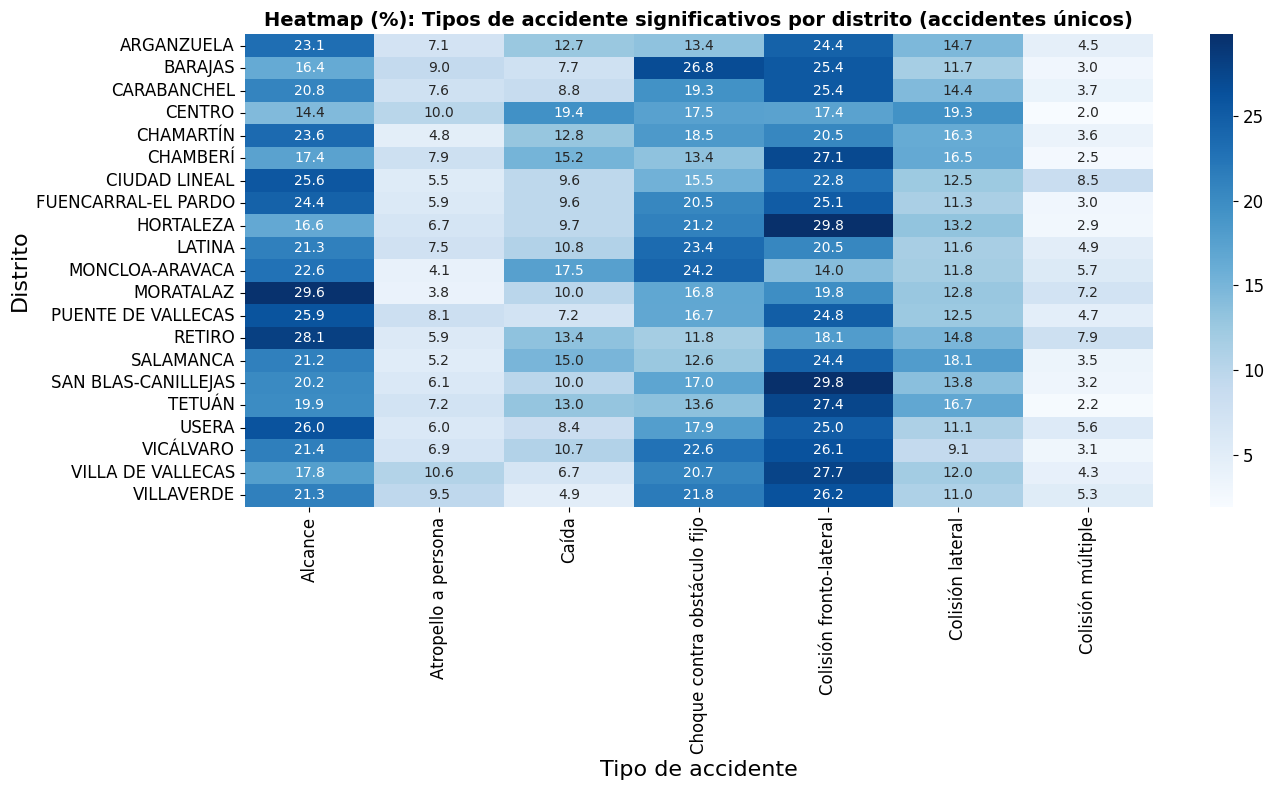

In [42]:
# 1. Definimos los tipos de accidente significativos:
tipos_significativos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

# 2. Filtramos el DataFrame original:
df_filtrado = df_21_bi[
    df_21_bi["tipo_accidente"].isin(tipos_significativos)
]

# 3. Creamos la tabla de contingencia con expedientes únicos:
tabla_contingencia = pd.crosstab(
    df_filtrado["distrito"],
    df_filtrado["tipo_accidente"],
    values=df_filtrado["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 4. Convertir a porcentajes por fila (por distrito)
tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

# 5. Dibujamos el Heatmap con frecuencias en porcentaje:
plt.figure(figsize=(14,8))
sns.heatmap(tabla_porcentajes, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap (%): Tipos de accidente significativos por distrito (accidentes únicos)")
plt.xlabel("Tipo de accidente")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()

¿Hay relación estadística entre distrito y tipo de accidente?

In [43]:

# 6. Lanazamos el test chi-cuadrado (se hace sobre la tabla de frecuencias absolutas):
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 832.5667834622298
P-Value: 4.7701200659055466e-107
Grados de Libertad: 120
Tabla de Frecuencias Esperadas:
 [[180.09146774  55.19711652  95.26577641 144.56617821 191.98156464
  115.13093831  35.76695817]
 [ 65.82805483  20.17596313  34.82208698  52.84264949  70.1741905
   42.08331364  13.07374143]
 [225.44457575  69.09761286 119.25691326 180.97281966 240.32900024
  144.12479319  44.77428504]
 [225.66473647  69.165091   119.37337509 181.14955093 240.56369653
  144.26554006  44.81800993]
 [250.54289766  76.79012054 132.53356181 201.12018435 267.08437722
  160.16993619  49.75892224]
 [201.44705743  61.74249586 106.56257386 161.70911132 214.7471047
  128.78338454  40.00827228]
 [238.21389742  73.01134484 126.01169936 191.22323328 253.94138502
  152.28811156  47.31032853]
 [196.38336091  60.1904987  103.88395178 157.64429213 209.34909005
  125.54620657  39.00259986]
 [143.54478847  43.99574569  75.93311274 115.22878752 153.02198062
   91.76695817  28.5086268 ]
 [184.2745

Comos el test Chi-Cuadrado nos da un p-valor muy pequeño, (<< 0.05), podemos rechazar las hipótesis nula de que las variables sean independientes. Por tanto, hay una relación estadísticamente significativa.

### Análisis bivariante por resultado de test de alcoholemia

Cruzamos las variables positivo en alcohol y tipo de accidente. ¿Influye el consumo de alcohol en el tipo de accidente?

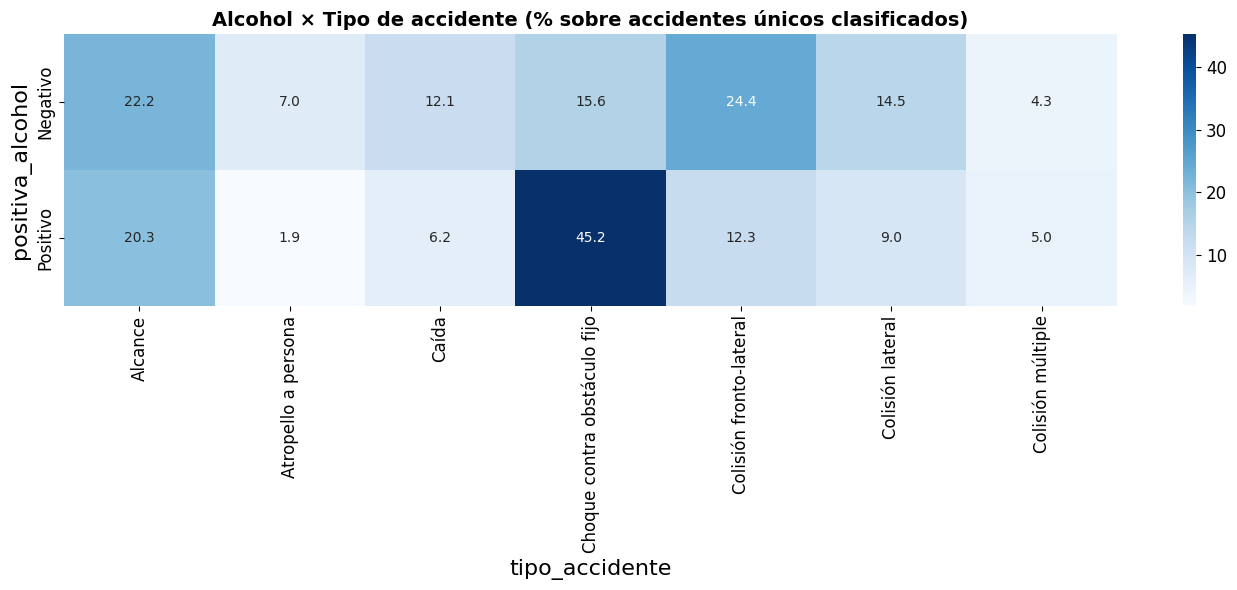

In [44]:
# 1. Filtramos el fataset po tipo de persona = conductor y seleccionamos los tipos más relevantes:
df_conductores = df_21_bi[
    (df_21_bi["tipo_persona"].str.lower() == "conductor") &
    (df_21_bi["tipo_accidente"].isin(tipos_significativos))
]

# 2. Quitamos "No consta" en alcohol:
df_conductores = df_conductores[
    df_conductores["positiva_alcohol"] != "No consta"
]

# 3. Clasificamos accidentes único en Negativo o positivo:
#    - Si algún conductor dio "Positivo" → "Positivo"
#    - Si todos dieron "Negativo" → "Negativo"
clasificacion_accidentes = (
    df_conductores
    .groupby("num_expediente")["positiva_alcohol"]
    .apply(lambda x: "Positivo" if x.str.lower().str.contains("pos", na=False).any() else "Negativo")
    .reset_index()
)

# 4. Creamos  dataset de tipo de accidente (único por expediente):
tipos_por_accidente = (
    df_conductores.groupby("num_expediente")["tipo_accidente"]
    .first()
    .reset_index()
)

# 5. Unimos clasificación y tipo de accidente:
df_accidentes_clasificados = clasificacion_accidentes.merge(
    tipos_por_accidente, on="num_expediente"
)

# 6. Tabla de contingencia (accidentes únicos)
ct = pd.crosstab(
    df_accidentes_clasificados["positiva_alcohol"],
    df_accidentes_clasificados["tipo_accidente"]
)

# 7. Convertir a porcentajes por fila
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# 8. Dibujamos Heatmap de porcentajes
plt.figure(figsize=(14,6))
sns.heatmap(ct_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Alcohol × Tipo de accidente (% sobre accidentes únicos clasificados)")
plt.tight_layout()
plt.show()

¿Hay relación estadística entre el consumo de alcohol y el tipo de accidente?

In [45]:
# 9. Realizamos test Chi-cuadrado (con tabla absoluta):
chi2, p, dof, expected = chi2_contingency(ct)

print("Chi-cuadrado:", chi2)
print("p-value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Chi-cuadrado: 720.784990150621
p-value: 1.9881981161326883e-152
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[3463.63668639 1046.71360947 1830.35443787 2774.81360947 3692.3147929
  2214.27337278  687.89349112]
 [ 262.36331361   79.28639053  138.64556213  210.18639053  279.6852071
   167.72662722   52.10650888]]


Podemos decir con confianza que existe una relación estadísticamente significativa entre ambas variables (p-value << 0.05).

Cruzamos las variables positivo en alcohol y lesividad. ¿Cómo se distribuyen los conductores con alcohol positivo y negativo según el grado de lesividad?

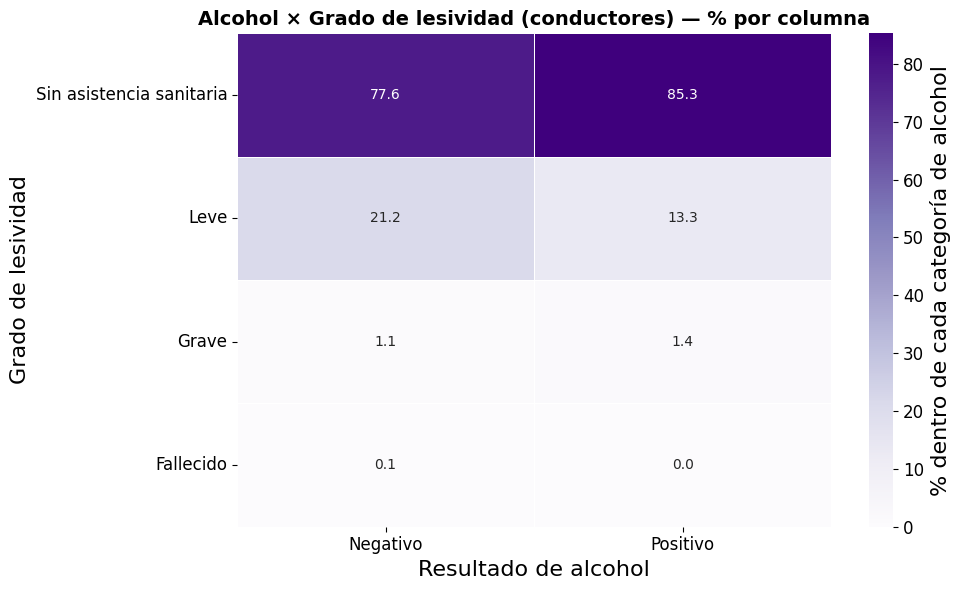

TEST CHI-CUADRADO
Valor Chi-Cuadrado: 47.42929567851318
P-Value: 2.8164751650163194e-10
Grados de Libertad: 3

Frecuencias Esperadas:

positiva_alcohol              Negativo    Positivo
lesividad                                         
Sin asistencia sanitaria  23949.300741  978.699259
Leve                       6431.186584  262.813416
Grave                       338.180113   13.819887
Fallecido                    16.332562    0.667438


In [46]:
# 1. Filtramos el dataset solo por CONDUCTORES:
df_conductores = df_21_bi.copy()
df_conductores = df_conductores[df_conductores["tipo_persona"].str.lower() == "conductor"]

# 2. Limpiamos los datos:
rangos_menores = ["De 6 a 9 años", "De 10 a 14 años", "De 15 a 17 años"]
df_conductores = df_conductores[~df_conductores["rango_edad"].isin(rangos_menores)]
df_conductores = df_conductores[df_conductores["positiva_alcohol"] != "No consta"]
df_conductores = df_conductores[df_conductores["rango_edad"] != "Desconocido"]

# 3. Creamos tabla de frecuencias absoluta: grado de lesividad × alcohol
tabla_abs = pd.crosstab(
    df_conductores["lesividad"],
    df_conductores["positiva_alcohol"],
)

# 4. Tabla porcentual para heatmap
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

orden_grado = [
    "Sin asistencia sanitaria",
    "Leve",
    "Grave",
    "Fallecido"
]

tabla_abs = tabla_abs.reindex(orden_grado)
tabla_pct = tabla_pct.reindex(orden_grado)

# 5. Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Purples",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada categoría de alcohol"}
)

plt.title("Alcohol × Grado de lesividad (conductores) — % por columna")
plt.xlabel("Resultado de alcohol")
plt.ylabel("Grado de lesividad")
plt.tight_layout()
plt.show()

# 6. Test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("TEST CHI-CUADRADO")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)

# Convertir esperadas a DataFrame con índices y columnas correctas
expected_df = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

print("\nFrecuencias Esperadas:\n")
print(expected_df)

In [47]:
tabla_abs

positiva_alcohol          Negativo  Positivo
lesividad                                   
Sin asistencia sanitaria     23857      1071
Leve                          6527       167
Grave                          334        18
Fallecido                       17         0

Pese al valor de p no ser muy pequeño, esta debajo de 0.05, indicando cierta relación estdística entre grado de lesividad y resultado de alcohol.

### Análisis bivariante demográfico

En primer lugar, cruzamos rango de edad con positivo en alcohol. ¿Cómo se distribuyen los accidentes con  positivo en alcohol según la edad del conductor?

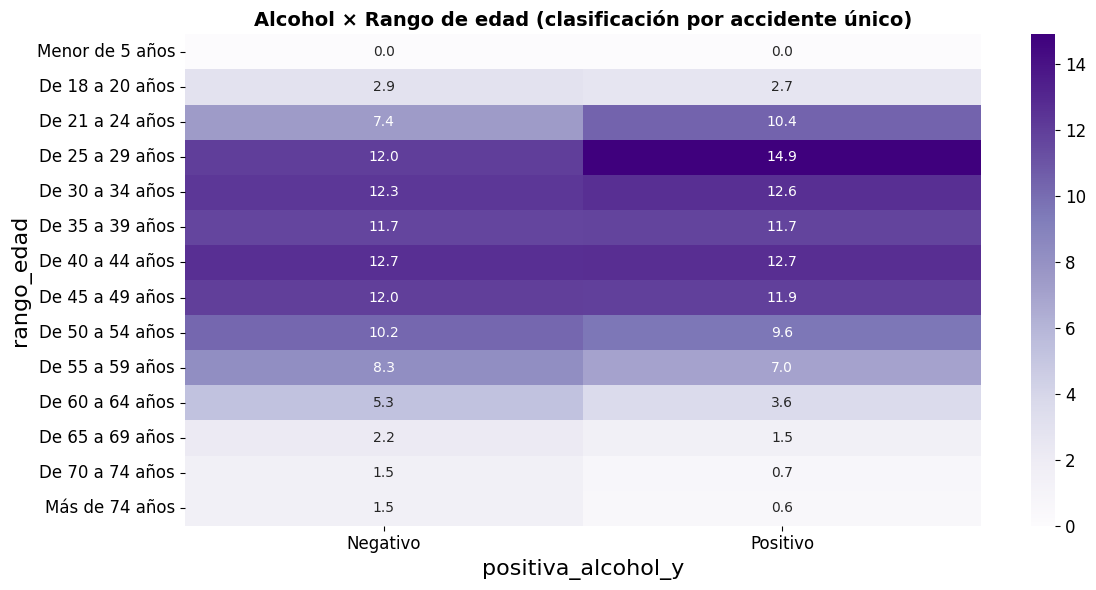

In [48]:
# 1. Filtramos el dataset por conductores
df_conductores = df_21_bi[
    df_21_bi["tipo_persona"].str.lower() == "conductor"
].copy()

# 2. Eliminamos menores de edad:
rangos_menores = ["De 6 a 9 años", "De 10 a 14 años", "De 15 a 17 años"]
df_conductores = df_conductores[~df_conductores["rango_edad"].isin(rangos_menores)]

# 3. Eliminamos positiva_alcohol = "No consta"
df_conductores = df_conductores[df_conductores["positiva_alcohol"] != "No consta"]

# 4. Eliminamos rango_edad desconocido
df_conductores = df_conductores[df_conductores["rango_edad"] != "Desconocido"]

# 5. Clasificamos accidentes según alcohol
# Si algún conductor del accidente dio positivo → accidente positivo
clasificacion_accidente = (
    df_conductores.groupby("num_expediente")["positiva_alcohol"]
    .apply(lambda x: "Positivo" if (x == "Positivo").any() else "Negativo")
    .reset_index()
)

# 6. Añadimos la clasificación al dataframe de conductores
df_conductores = df_conductores.merge(clasificacion_accidente, on="num_expediente")

# 7. Creamos Tabla de contingencia: Rango de edad × Alcohol (por accidente único)
tabla_edad_alcohol = pd.crosstab(
    df_conductores["rango_edad"],
    df_conductores["positiva_alcohol_y"],  # columna creada por el merge
    values=df_conductores["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 8. Normalizamos por columna (cada columna = 100%)
tabla_edad_alcohol_pct = tabla_edad_alcohol.div(
    tabla_edad_alcohol.sum(axis=0), axis=1
) * 100

# 9. Dibujamos el Heatmap:
plt.figure(figsize=(12,6))
sns.heatmap(tabla_edad_alcohol_pct, annot=True, fmt=".1f", cmap="Purples")
plt.title("Alcohol × Rango de edad (clasificación por accidente único)")
plt.tight_layout()
plt.show()

¿Existe una relación estadísticamente significativa entre el rango de edad y el alcohol en accidentes?

In [49]:
# 10. Realizamos el test de Chi-cuadrado sobre tabla absoluta
chi2, p, dof, expected = chi2_contingency(tabla_edad_alcohol)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 65.6659104305106
P-Value: 4.9888088637634345e-09
Grados de Libertad: 13
Frecuencias Esperadas:
 [[8.40892112e+00 5.91078876e-01]
 [7.54934252e+02 5.30657480e+01]
 [1.96395024e+03 1.38049755e+02]
 [3.14026488e+03 2.20735122e+02]
 [3.17203191e+03 2.22968087e+02]
 [3.01039376e+03 2.11606238e+02]
 [3.26172707e+03 2.29272928e+02]
 [3.08327108e+03 2.16728921e+02]
 [2.61797744e+03 1.84022557e+02]
 [2.10877055e+03 1.48229447e+02]
 [1.33421549e+03 9.37845150e+01]
 [5.50317171e+02 3.86828286e+01]
 [3.77467126e+02 2.65328740e+01]
 [3.80270100e+02 2.67299003e+01]]


En este caso el valor de p no es tan pequeño como en el caso anterior, pero se puede afirmar que existe una relación estadísticamente significativa entre ambas variables.

Ahora, cruzamos el tipo de persona con el grado de lesividad:

Tabla absoluta:
lesividad     Grave  Leve  Sin asistencia sanitaria
tipo_persona                                       
Conductor       358  6777                     25164
Pasajero         45  1765                      4498
Peatón          148   973                       189

Tabla en porcentaje (% por columna):
lesividad     Grave  Leve  Sin asistencia sanitaria
tipo_persona                                       
Conductor      65.0  71.2                      84.3
Pasajero        8.2  18.5                      15.1
Peatón         26.9  10.2                       0.6


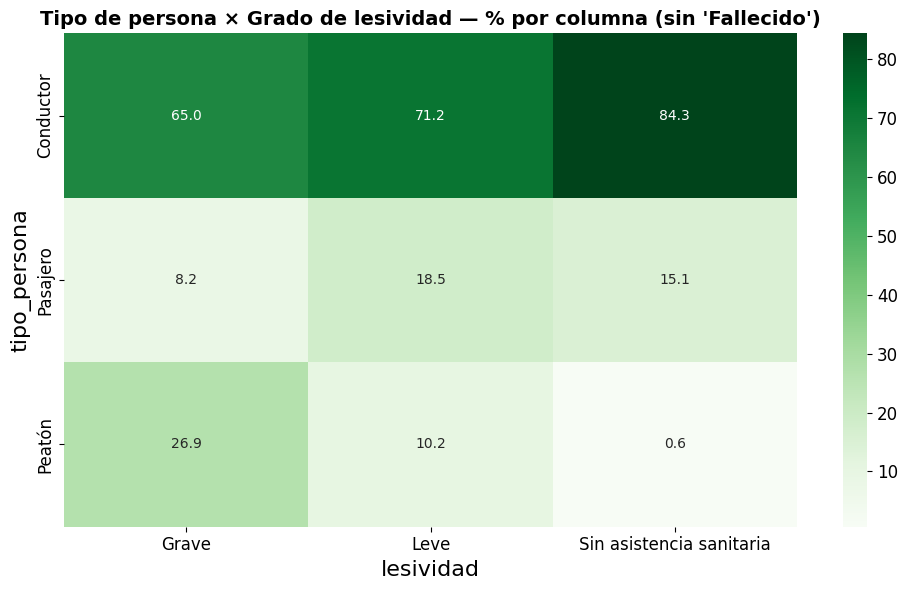


--- Chi-cuadrado ---
Chi2: 3215.530240938925
p-value: 0.0
Grados de libertad: 4
Frecuencias esperadas:
 [[4.45843851e+02 7.69910026e+03 2.41540559e+04]
 [8.70733773e+01 1.50363554e+03 4.71729108e+03]
 [1.80827718e+01 3.12264198e+02 9.79653030e+02]]


In [50]:
# Hacemos una copia del dataframe
df = df_21_bi.copy()

# 1. Eliminamos registros sin lesividad válida:
df = df[df["lesividad"] != "Se desconoce"]

# 2. Eliminamos fallecidos:
df = df[df["lesividad"] != "Fallecido"]

# 3. Creamos tabla de contingencia absoluta (PERSONAS)
tabla_abs = pd.crosstab(
    df["tipo_persona"],
    df["lesividad"]
)

print("Tabla absoluta:")
print(tabla_abs)

# 4. Creamos tabla de frecuencias relativas:
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100
print("\nTabla en porcentaje (% por columna):")
print(tabla_pct.round(1))

# 5. Dibujamos heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Greens")
plt.title("Tipo de persona × Grado de lesividad — % por columna (sin 'Fallecido')")
plt.tight_layout()
plt.show()

# 6. Realizamos el test de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

Obtenemos un valor de p menos a 0.05 por lo que hay relación estdísticamente siginicativa.

Finalmente, cruzamos las variables rango de edad y lesividad:

Tabla absoluta:
lesividad        Grave  Leve  Sin asistencia sanitaria
rango_edad                                            
De 18 a 20 años     21   355                       943
De 21 a 24 años     43   839                      2045
De 25 a 29 años     80  1373                      2951
De 30 a 34 años     65  1274                      2898
De 35 a 39 años     47  1068                      2850
De 40 a 44 años     47   981                      3204
De 45 a 49 años     50   879                      3028
De 50 a 54 años     39   681                      2652
De 55 a 59 años     35   587                      2087
De 60 a 64 años     24   375                      1365
De 65 a 69 años     20   186                       584
De 70 a 74 años     12   131                       434
Más de 74 años      38   257                       489


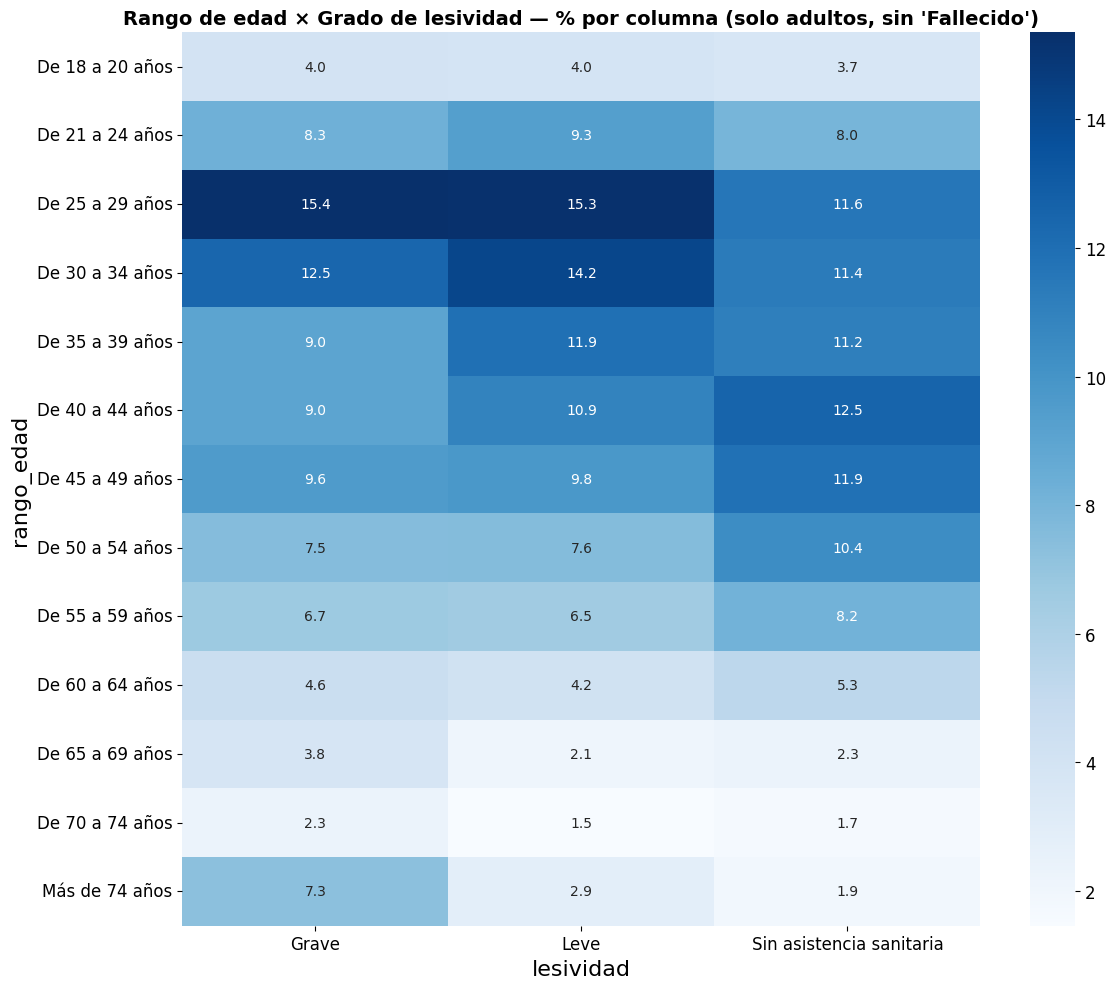

In [51]:
# Copiamos el dataframe
df = df_21_bi.copy()

# 1. Eliminamos los registros sin lesividad válida:
df = df[df["lesividad"] != "Se desconoce"]

# 2. Eliminamos los fallecidos:
df = df[df["lesividad"] != "Fallecido"]

# 3. Eliminamos las edades desconocidas:
df = df[df["rango_edad"] != "Desconocido"]

# 4. Eliminamos los menores de 18 años:
rangos_menores = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años"
]
df = df[~df["rango_edad"].isin(rangos_menores)]

# 5. Orden correcto de los rangos de edad (solo adultos):
orden_edades_adultos = [
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]
df["rango_edad"] = pd.Categorical(df["rango_edad"], categories=orden_edades_adultos, ordered=True)

# 6. Creamos tabla de frecuencias absolutas:
tabla_abs = pd.crosstab(df["rango_edad"], df["lesividad"])
print("Tabla absoluta:")
print(tabla_abs)

# 7. Creamos tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 8. Dibujamos el heatmap
plt.figure(figsize=(12,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Rango de edad × Grado de lesividad — % por columna (solo adultos, sin 'Fallecido')")
plt.tight_layout()
plt.show()

In [52]:
# 9. Realizamos el test de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 383.99407061498323
p-value: 1.4365144332614643e-66
Grados de libertad: 24
Frecuencias esperadas:
 [[  19.61352285  338.28621172  961.10026543]
 [  43.52447413  750.69275338 2132.7827725 ]
 [  65.48745612 1129.50149842 3209.01104547]
 [  63.00416702 1086.67071953 3087.32511345]
 [  58.9595285  1016.910409   2889.13006251]
 [  62.92981705 1085.38836088 3083.68182207]
 [  58.84056854 1014.85863516 2883.3007963 ]
 [  50.14162171  864.82267317 2457.03570511]
 [  40.28281531  694.78191626 1973.93526843]
 [  26.23067043  452.41613152 1285.35319805]
 [  11.74729572  202.61266661  575.64003767]
 [   8.57998687  147.98418814  420.43582499]
 [  11.65807575  201.07383623  571.26808802]]


p-value = 1.43 e-66 --> hay relación estadísticamente significativa entre rango edad y lesividad

### Análisis bivariante por factores que afectan al accidente

Cruzamos tipo de accidente por grado de lesividad:

Tabla absoluta:


lesividad                     Fallecido  Grave  Leve  Sin asistencia sanitaria
tipo_accidente                                                                
Alcance                               1     45  2129                      7475
Atropello a persona                   9    155  1049                      1359
Caída                                 1     91  1758                       920
Choque contra obstáculo fijo          7     27   453                      4402
Colisión fronto-lateral               6    166  2413                      7280
Colisión lateral                      1     28   812                      4718
Colisión múltiple                     1      6   492                      2256

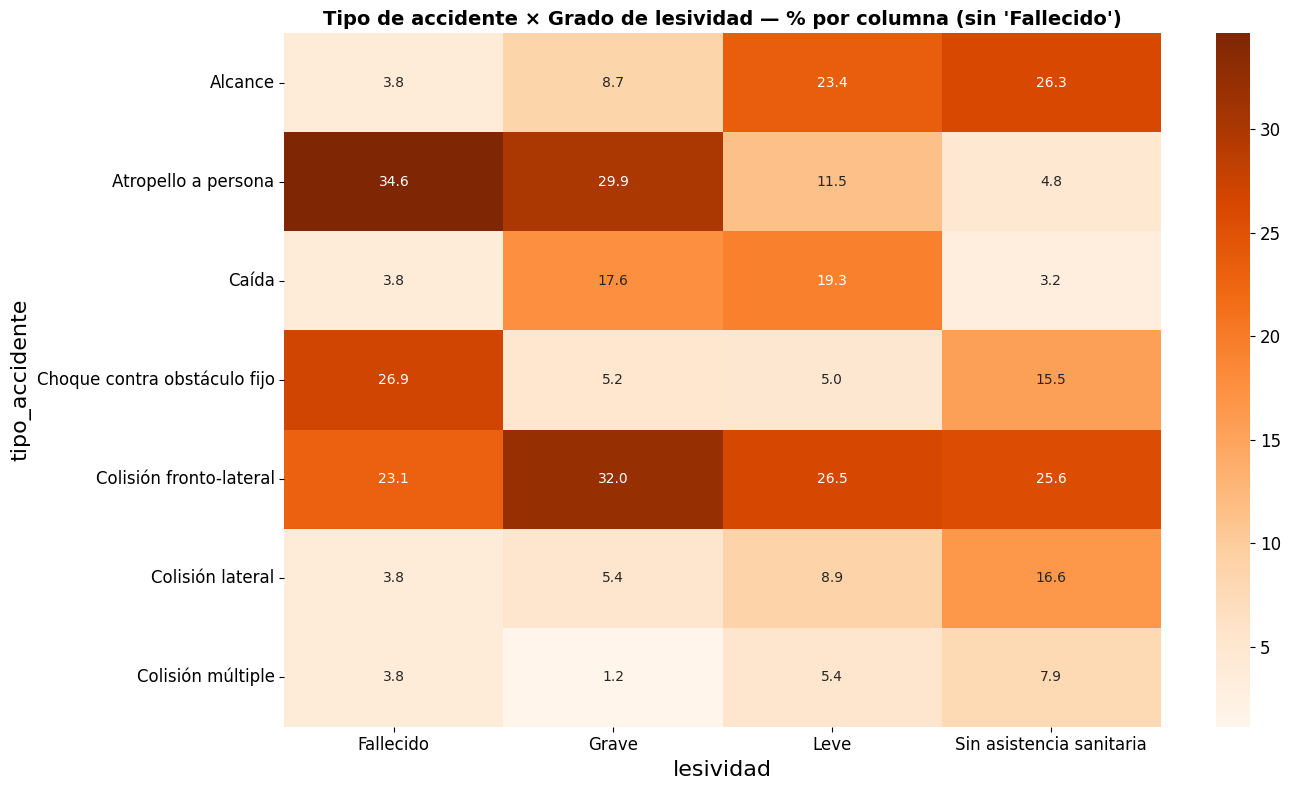


--- Chi-cuadrado ---
Chi2: 4551.170618918672
p-value: 0.0
Grados de libertad: 18
Frecuencias esperadas:
 [[6.59222281e+00 1.31337362e+02 2.30879926e+03 7.20327115e+03]
 [1.75701524e+00 3.50051498e+01 6.15360799e+02 1.91987704e+03]
 [1.89227535e+00 3.76999475e+01 6.62733053e+02 2.06767472e+03]
 [3.33983184e+00 6.65397267e+01 1.16971188e+03 3.64940857e+03]
 [6.73909616e+00 1.34263531e+02 2.36023883e+03 7.36375854e+03]
 [3.79753022e+00 7.56584866e+01 1.33001193e+03 4.14953205e+03]
 [1.88202838e+00 3.74957961e+01 6.59144246e+02 2.05647793e+03]]


In [53]:
# Hacemos una copia del dataframe:
df = df_21_bi.copy()

# 1. Eliminamos los registros sin lesividad válida:
df = df[df["lesividad"] != "Se desconoce"]

# 2. Mantenemos SOLO los 7 tipos de accidente seleccionados:
tipos_validos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

df = df[df["tipo_accidente"].isin(tipos_validos)]

# 3. Ordenamos las categorías de lesividad con fallecio
orden_lesividad = [
    "Fallecido",
    "Grave",
    "Leve",
    "Sin asistencia sanitaria"
]

df["lesividad"] = pd.Categorical(df["lesividad"],
                                       categories=orden_lesividad,
                                       ordered=True)

# 4. Creamos la tabla de frecuencias absolutas:
tabla_abs = pd.crosstab(
    df["tipo_accidente"],
    df["lesividad"]
)

print("Tabla absoluta:")
display(tabla_abs)

# 5. Creamos la tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 6. Dibujamos Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Oranges")
plt.title("Tipo de accidente × Grado de lesividad — % por columna (sin 'Fallecido')")
plt.tight_layout()
plt.show()

# 7. Realizamos el test de Chi-cuadrado:
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

In [54]:
# Compruebo si al menos el 80% de celdas tienen una frecuencia esperada mayor o igual que 5

df_expected = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

porcentaje = (df_expected >= 5).sum().sum() / df_expected.size * 100
print(porcentaje)

82.14285714285714


El test chi-cuadrado revela que hay relación estadística.

### Análisis bivariante temporal

Cruzamos las variables franja horaria y lesividad. ¿Cómo se distribuyen los ACCIDENTES según su gravedad en cada franja horaria?

Tabla absoluta:


lesividad  Fallecido  Grave  Leve  Sin asistencia sanitaria
franja                                                     
Madrugada          6     45   491                      1294
Mañana             5    119  1736                      3316
Tarde              9    175  3070                      5998
Noche              8    187  2539                      5404

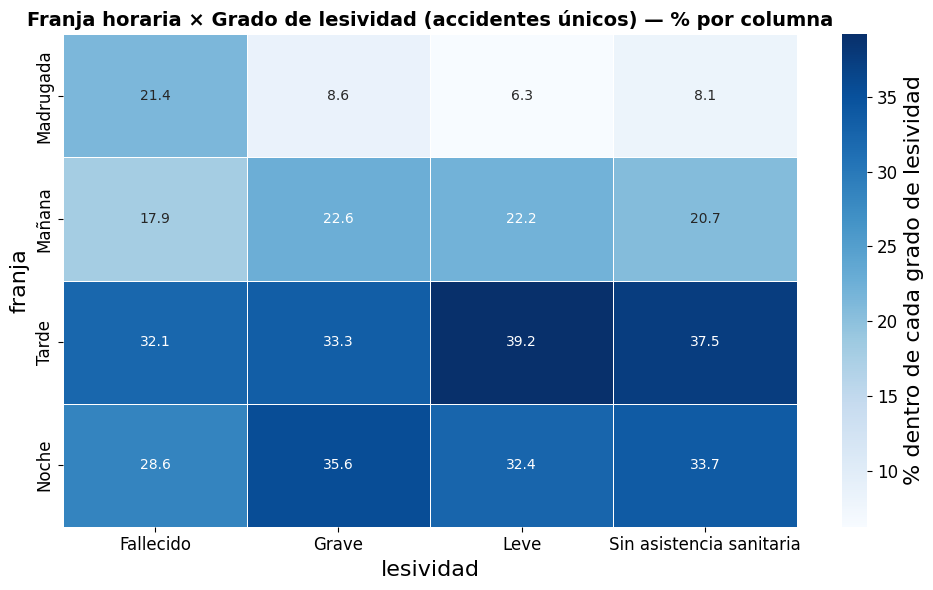


--- Resultados Chi-cuadrado ---
Valor Chi-Cuadrado: 48.1120029168074
P-Value: 2.4338667990952416e-07
Grados de Libertad: 9

Frecuencias Esperadas:
 [[2.10671256e+00 3.95761003e+01 5.89578559e+02 1.20473863e+03]
 [5.93918531e+00 1.11571838e+02 1.66212343e+03 3.39636554e+03]
 [1.06161790e+01 1.99432506e+02 2.97101352e+03 6.07093779e+03]
 [9.33792312e+00 1.75419556e+02 2.61328448e+03 5.33995804e+03]]


In [55]:
# 1. Realizamos copia del dataset:
df = df_21_bi.copy()

# 2. Creamos columna de hora a patir de la variable fecha_hora (datetime): 
df["hora"] = df["fecha_hora"].dt.hour

# 3. Creamos franja horaria: 
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

# 4. Eliminamos categoría "Se desconoce" en lesividad: 
df = df[df["lesividad"] != "Se desconoce"]

# 5. Creamos la Tabla de frecuencias absolutas: Franja × Grado de lesividad (accidentes únicos)
tabla_abs = pd.crosstab(
    df["franja"],
    df["lesividad"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla absoluta:")
display(tabla_abs)

# 6. Convertimos la tabla a porcentajes por columna (cada columna suma 100%)
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 7. Dibujamos el Heatmap con frecuencias en porcentaje:
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada grado de lesividad"}
)

plt.title("Franja horaria × Grado de lesividad (accidentes únicos) — % por columna")
plt.tight_layout()
plt.show()

# 8. Realizamos el test Chi-cuadrado (siempre con tabla absoluta):
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("\nFrecuencias Esperadas:\n", expected)

In [56]:
# Comprobamos si al menos el 80% de celdas tienen una frecuencia esperada mayor o igual que 5

df_expected = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

porcentaje = (df_expected >= 5).sum().sum() / df_expected.size * 100
print(porcentaje)

93.75


p-value <<< 0.05 por lo que existe relación estadísticamente significativa. 

Ahora cruzamos las variables franja horaria con positivo alcohol:

Tabla absoluta:


alcohol_accidente  Negativo  Positivo
franja                               
Madrugada              1082       430
Mañana                 3573       138
Tarde                  6544       110
Noche                  5468       573

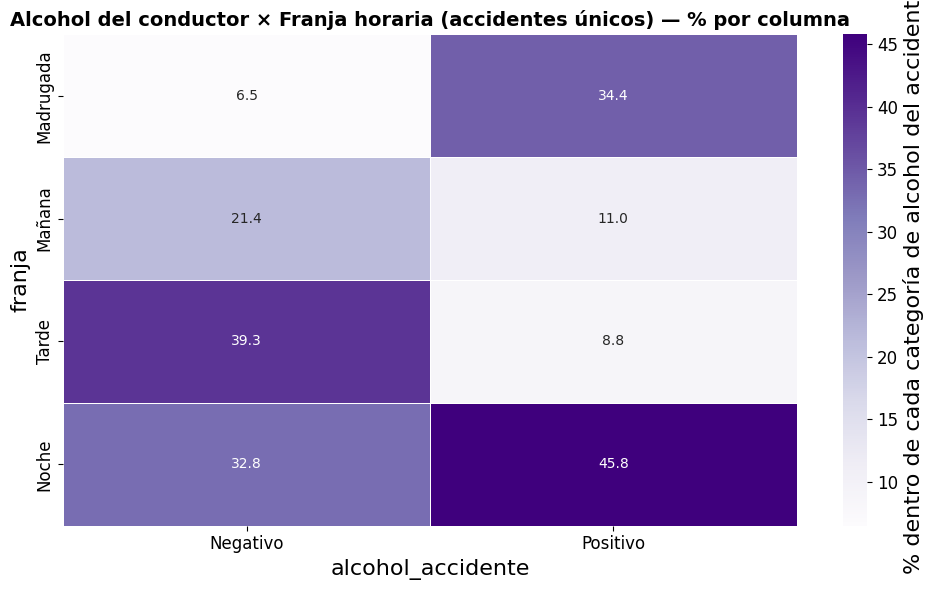


--- Resultados Chi-cuadrado ---
Valor Chi-Cuadrado: 1482.0005373879885
P-Value: 0.0
Grados de Libertad: 3

Frecuencias Esperadas:
 [[1406.4350932   105.5649068 ]
 [3451.90517915  259.09482085]
 [6189.43062842  464.56937158]
 [5619.22909923  421.77090077]]


In [57]:
# 1. Realizamos copia del dataset: 
df = df_21_bi.copy()

# 2. Filtramos alcohol registrado (opcional pero recomendable)
df = df[df["positiva_alcohol"] != "No consta"]

# 3. Creamos columna hora desde la variable fecha_hora :
df["hora"] = df["fecha_hora"].dt.hour

# 4. Crear franja horaria 
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

# 5. Filtramos solo conductores para clasificar el accidente:
df_cond = df[df["tipo_persona"].str.lower() == "conductor"]

# 6. Clasificamos accidente según alcohol del conductor:
alcohol_accidente = df_cond.groupby("num_expediente")["positiva_alcohol"].apply(
    lambda x: "Positivo" if "Positivo" in x.values else "Negativo"
).reset_index().rename(columns={"positiva_alcohol": "alcohol_accidente"})

# 7. Unimos clasificación al dataframe original
df = df.merge(alcohol_accidente, on="num_expediente", how="left")

# 8. Creamos tabla absoluta: Alcohol del accidente × Franja (accidentes únicos)
tabla_abs = pd.crosstab(
    df["franja"],
    df["alcohol_accidente"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla absoluta:")
display(tabla_abs)

# 9. Convertimos a porcentajes por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 10. Dibujamos el heatmap en porcentaje:
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Purples",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada categoría de alcohol del accidente"}
)

plt.title("Alcohol del conductor × Franja horaria (accidentes únicos) — % por columna")
plt.tight_layout()
plt.show()

# 11. Realizamos el test Chi-cuadrado (sobre tabla absoluta):
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("\nFrecuencias Esperadas:\n", expected)

El test Chi-cuadrado confirma que la franja horaria influye en la presencia del alcohol en conductores.

## Análisis multivariante

In [58]:
#Hacemos copia del dataframe
df_21_multi=df_21_bi.copy()

C:\Users\aquin\AppData\Local\Temp\ipykernel_16304\4214346167.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  .apply(lambda x: x.unary_union.centroid)


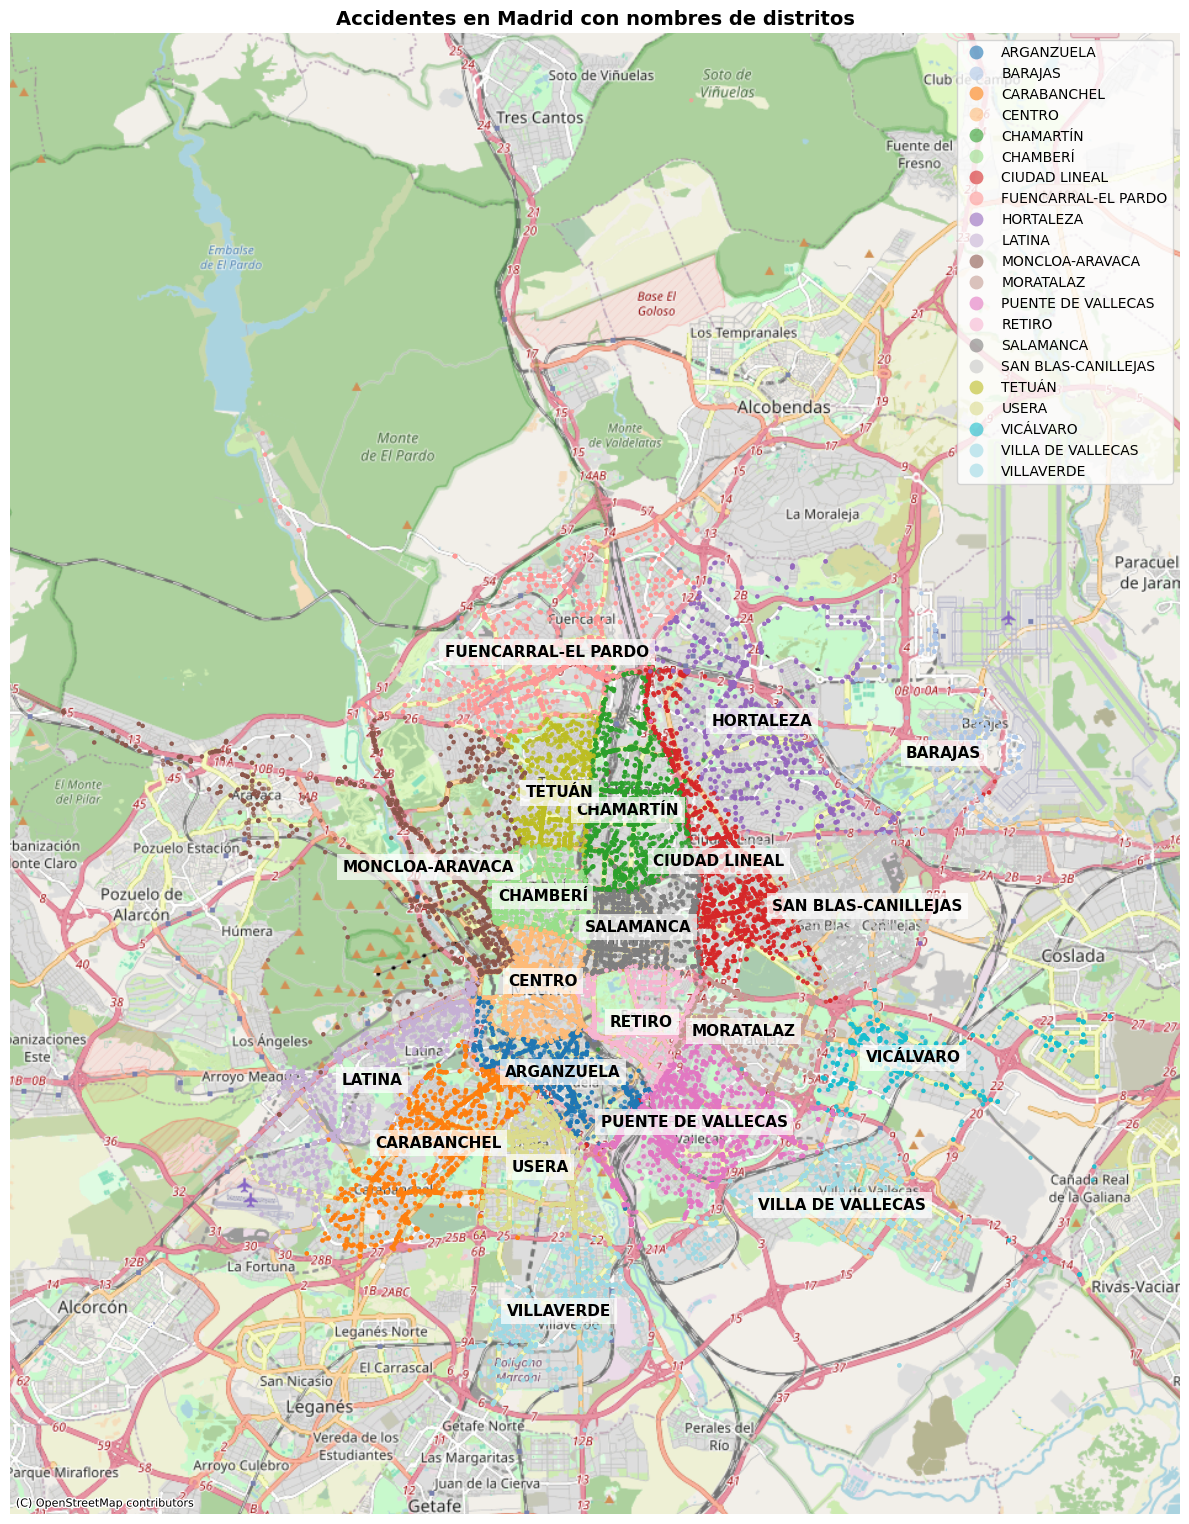

In [59]:

# 1. Convertimos el dataframe a GeoDataFrame:
df = df_21_multi.copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["coordenada_x_utm"], df["coordenada_y_utm"]),
    crs="EPSG:25830"
)

# 2. Reproyectamos a Web Mercator:
gdf_web = gdf.to_crs(epsg=3857)

# 3. Calculamos el centro aproximado de cada distrito:
centros = (
    gdf_web.groupby("distrito", observed = False)["geometry"]
    .apply(lambda x: x.unary_union.centroid)
    .reset_index()
)

# 4. Creamos el mapa con colores por distrito:
fig, ax = plt.subplots(figsize=(12, 16))

gdf_web.plot(
    ax=ax,
    column="distrito",
    markersize=5,
    alpha=0.6,
    legend=True,
    categorical=True,
    cmap="tab20"
)

# 5. Añadimos mapa base:
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    zoom=12
)

# 6. Añadimos los nombres de los distritos:
for _, row in centros.iterrows():
    ax.text(
        row.geometry.x,
        row.geometry.y,
        row["distrito"],
        fontsize=11,
        fontweight="bold",
        color="black",
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

# 7. Ajustes finales
ax.set_title("Accidentes en Madrid con nombres de distritos")
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [60]:
# 1. Superficie oficial de los 21 distritos de Madrid (km²)
superficie_distritos = {
    "CENTRO": 5.23,
    "ARGANZUELA": 6.46,
    "RETIRO": 5.47,
    "SALAMANCA": 5.38,
    "CHAMARTÍN": 5.99,
    "TETUÁN": 5.38,
    "CHAMBERÍ": 4.69,
    "FUENCARRAL-EL PARDO": 237.81,
    "MONCLOA-ARAVACA": 46.65,
    "LATINA": 25.41,
    "CARABANCHEL": 14.76,
    "USERA": 7.75,
    "PUENTE DE VALLECAS": 14.89,
    "MORATALAZ": 6.34,
    "CIUDAD LINEAL": 11.43,
    "HORTALEZA": 27.41,
    "VILLAVERDE": 20.29,
    "VILLA DE VALLECAS": 48.34,
    "VICÁLVARO": 14.40,
    "SAN BLAS-CANILLEJAS": 22.36,
    "BARAJAS": 41.94
}

df_superficie = pd.DataFrame(
    list(superficie_distritos.items()),
    columns=["distrito", "area_km2"]
)

# 2. Copia del dataframe original
df_acc = df_21_multi.copy()

# 3. Contar EXPEDIENTES ÚNICOS por distrito
acc_por_distrito = (
    df_acc.groupby("distrito", observed = False)["num_expediente"]
    .nunique()
    .reset_index(name="n_accidentes_unicos")
)

# 4. Unir accidentes únicos + superficie
df_densidad = acc_por_distrito.merge(df_superficie, on="distrito", how="left")

# 5. Calcular densidad REAL
df_densidad["densidad_accidentes_km2"] = (
    df_densidad["n_accidentes_unicos"] / df_densidad["area_km2"]
)
df_densidad

distrito  n_accidentes_unicos  area_km2  \
0            ARGANZUELA                  843      6.46   
1               BARAJAS                  315     41.94   
2           CARABANCHEL                 1089     14.76   
3                CENTRO                 1059      5.23   
4             CHAMARTÍN                 1184      5.99   
5              CHAMBERÍ                  941      4.69   
6         CIUDAD LINEAL                 1138     11.43   
7   FUENCARRAL-EL PARDO                  942    237.81   
8             HORTALEZA                  725     27.41   
9                LATINA                  898     25.41   
10      MONCLOA-ARAVACA                 1031     46.65   
11            MORATALAZ                  493      6.34   
12   PUENTE DE VALLECAS                 1323     14.89   
13               RETIRO                  874      5.47   
14            SALAMANCA                 1337      5.38   
15  SAN BLAS-CANILLEJAS                  839     22.36   
16               TETUÁN                  777      5.38   
17                USERA                  739      7.75   
18            VICÁLVARO                  354     14.40   
19    VILLA DE VALLECAS                  466     48.34   
20           VILLAVERDE                  576     20.29   

    densidad_accidentes_km2  
0                130.495356  
1                  7.510730  
2                 73.780488  
3                202.485660  
4                197.662771  
5                200.639659  
6                 99.562555  
7                  3.961145  
8                 26.450201  
9                 35.340417  
10                22.100750  
11                77.760252  
12                88.851578  
13               159.780622  
14               248.513011  
15                37.522361  
16               144.423792  
17                95.354839  
18                24.583333  
19                 9.640050  
20                28.388369